BGL data set import

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv("/content/BGL Data.csv")

### Cleaning of dataset

In [65]:
df.head(10)

,Renewal_Date,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,...,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,Vehicle_Liability_Category,No_Claims_Discount,Credit_Score,Previous_Discount,Data_Quality
0,20160606,1,35.37,0.0000,35.41,376.77,381.53,269.42,8,I,...,H,5,999,P,M,NaN,9,581,0,OK
1,20160704,0,117.11,14.5566,41.77,444.66,408.65,242.61,8,I,...,H,3,1149,P,M,3,9,526,0,OK
2,20160803,1,106.92,43.5370,61.08,649.08,538.19,398.45,8,I,...,H,5,1499,P,M,NaN,7,586,1,OK
3,20160705,1,194.65,99.8576,70.20,746.76,743.49,299.46,8,I,...,E,5,2902,D,A,11,9,540,0,OK
4,20160302,1,32.98,19.0900,0.00,303.93,310.12,224.23,7,T,...,H,3,1300,P,M,4,8,531,1,OK
5,20160408,0,-113.93,19.0900,0.00,772.85,484.01,787.07,7,I,...,E,5,2995,P,A,15,3,589,1,OK
6,20160331,0,35.47,29.9800,0.00,377.02,247.79,274.10,7,I,...,H,5,1597,D,M,NaN,9,596,1,OK
7,20160401,1,42.92,23.1500,26.88,285.50,298.50,169.41,7,I,...,H,5,1868,D,M,4,9,561,0,OK
8,20160511,1,121.30,19.0900,41.17,438.21,403.86,220.55,6,I,...,H,5,1910,D,M,12,8,561,0,OK
9,20160330,1,224.78,84.7800,78.48,834.63,653.53,345.82,7,I,...,H,5,1396,P,M,7,8,557,0,OK


#### Descriptive

In [66]:
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('fivethirtyeight')

In [67]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Renewal_Date                            10285 non-null  int64  
 1   Sale                                    10285 non-null  int64  
 2   Main_Income                             10285 non-null  float64
 3   Addon_Income                            10285 non-null  float64
 4   Finance_Income                          10285 non-null  float64
 5   Gross_Price                             10285 non-null  float64
 6   Last_Yr_Gross_Price                     10285 non-null  float64
 7   Net_Premium                             10285 non-null  float64
 8   Previous_Renewals                       10285 non-null  int64  
 9   First_Contact_Channel                   10285 non-null  object 
 10  Renewal_Offer_Type                      10285 non-null  ob

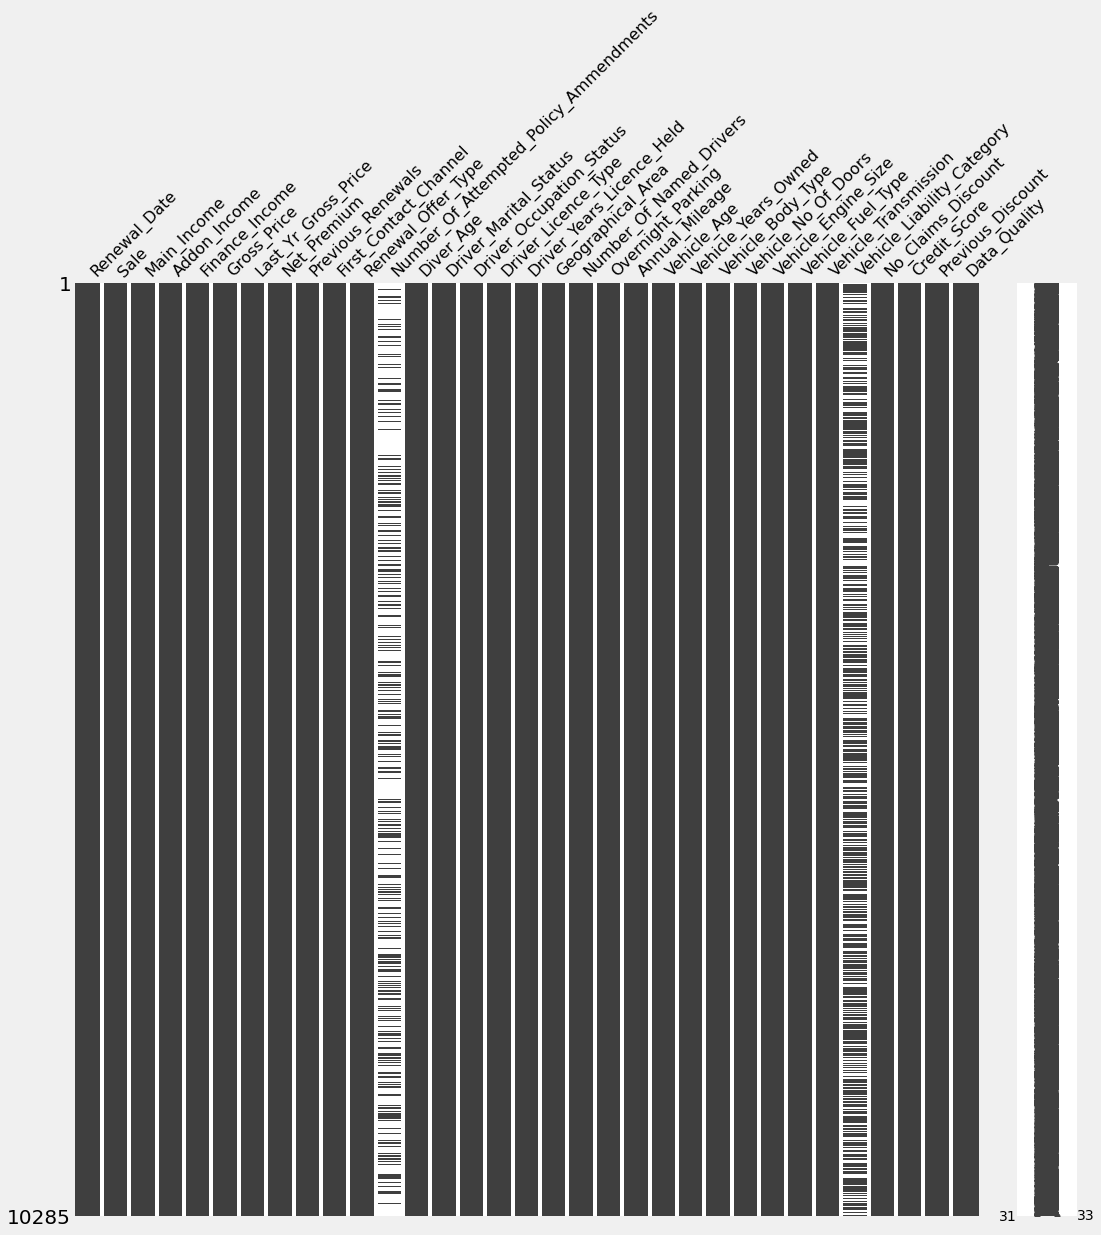

In [68]:
#missing value
import missingno as msno

msno.matrix(df.sample(df.shape[0]), figsize=(16, 16), width_ratios=(15, 1))
plt.rcParams['font.sans-serif']=['SimHei']   
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [69]:
df.isnull().sum()

Renewal_Date                                 0
Sale                                         0
Main_Income                                  0
Addon_Income                                 0
Finance_Income                               0
Gross_Price                                  0
Last_Yr_Gross_Price                          0
Net_Premium                                  0
Previous_Renewals                            0
First_Contact_Channel                        0
Renewal_Offer_Type                           0
Number_Of_Attempted_Policy_Ammendments    7285
Diver_Age                                    0
Driver_Marital_Status                        0
Driver_Occupation_Status                     0
Driver_Licence_Type                          0
Driver_Years_Licence_Held                    0
Geographical_Area                            0
Number_Of_Named_Drivers                      0
Overnight_Parking                            0
Annual_Mileage                               0
Vehicle_Age  

In [70]:
#delete the variables
df=df.drop(['Number_Of_Attempted_Policy_Ammendments','Vehicle_Liability_Category'],axis=1)

In [71]:
#check the duplicated items
df.duplicated().sum()

0

In [72]:
df['Data_Quality'].value_counts()

OK                            10167
Unacceptable                    106
Quote Total Premium Error         9
Policy Total Premium Error        3
Name: Data_Quality, dtype: int64

In [73]:
df=df[df['Data_Quality']=='OK']
df=df.drop(['Renewal_Date','Data_Quality'],axis=1)
df.describe()

,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,Diver_Age,Driver_Years_Licence_Held,...,Number_Of_Named_Drivers,Overnight_Parking,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_No_Of_Doors,Vehicle_Engine_Size,No_Claims_Discount,Credit_Score,Previous_Discount
count,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,...,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000
mean,0.616504,64.113639,24.646303,40.260929,608.695687,539.424257,424.986027,1.165044,47.783515,19.853644,...,0.245205,3.365693,7871.206256,7.948952,2.924166,4.535753,1753.343366,7.383987,567.235468,0.100620
std,0.486261,88.459861,22.271508,41.645005,340.951555,328.175949,231.724346,1.635032,12.580023,9.057656,...,0.488678,1.141234,3540.510246,4.654907,2.711459,0.857135,440.953848,2.672035,375.946363,0.300839
min,0.000000,-906.200000,0.000000,0.000000,150.550000,139.880000,119.050000,0.000000,23.000000,0.000000,...,0.000000,1.000000,200.000000,0.000000,0.000000,2.000000,0.000000,0.000000,426.000000,0.000000
25%,0.000000,10.240000,6.370000,0.000000,381.295000,334.100000,276.340000,0.000000,39.000000,14.000000,...,0.000000,3.000000,5000.000000,4.000000,1.000000,4.000000,1461.000000,6.000000,537.000000,0.000000
50%,1.000000,39.400000,20.464200,38.410000,511.790000,439.350000,360.630000,1.000000,48.000000,21.000000,...,0.000000,4.000000,7999.000000,8.000000,2.000000,5.000000,1686.000000,9.000000,558.000000,0.000000
75%,1.000000,97.975000,35.888600,62.160000,728.305000,629.100000,498.895000,2.000000,56.000000,26.000000,...,0.000000,4.000000,10000.000000,11.000000,4.000000,5.000000,1995.000000,9.000000,575.000000,0.000000
max,1.000000,700.000000,149.876600,398.050000,4233.050000,4278.990000,3118.680000,9.000000,78.000000,61.000000,...,2.000000,7.000000,25000.000000,33.000000,29.000000,5.000000,4701.000000,9.000000,9999.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf3a77d6d0>,
      dtype=object)

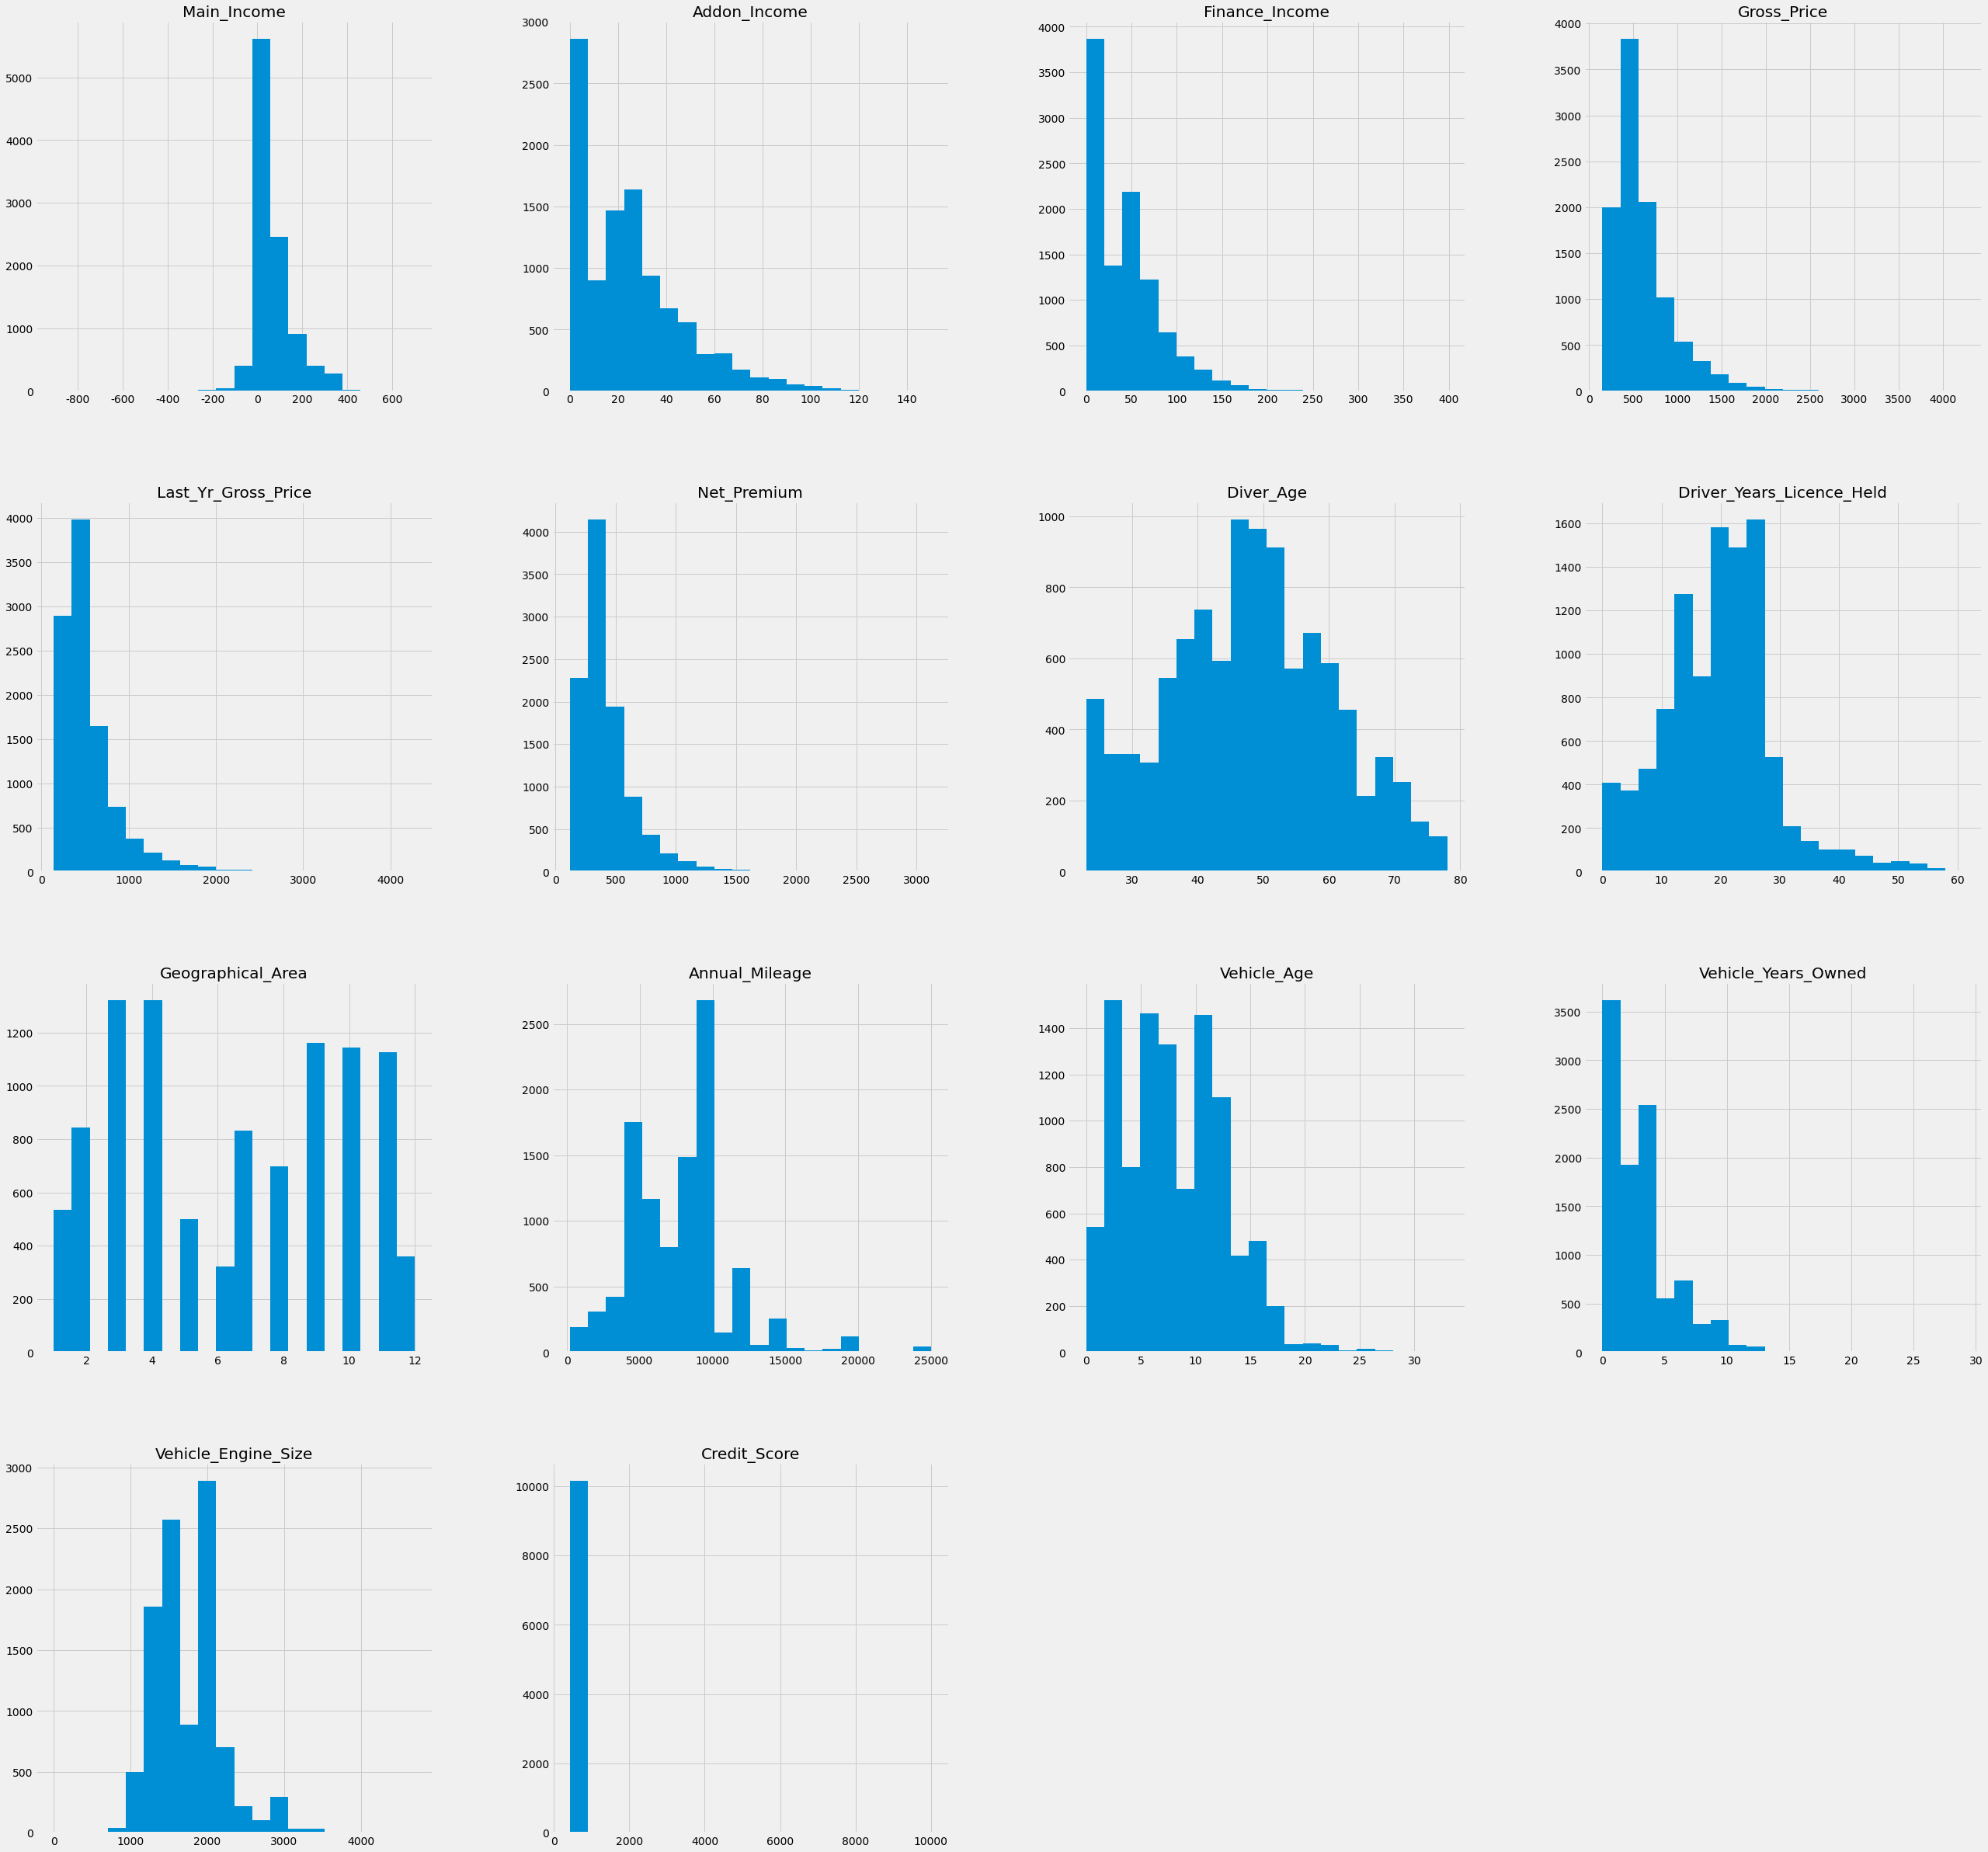

In [74]:
cat=[]   #catagory
num=[]   #numerical
for i in df.columns:
    if df[i].value_counts().count()>10:
        num.append(i)
    else:
        cat.append(i)
df[num].hist(bins=20,figsize=(40,40))

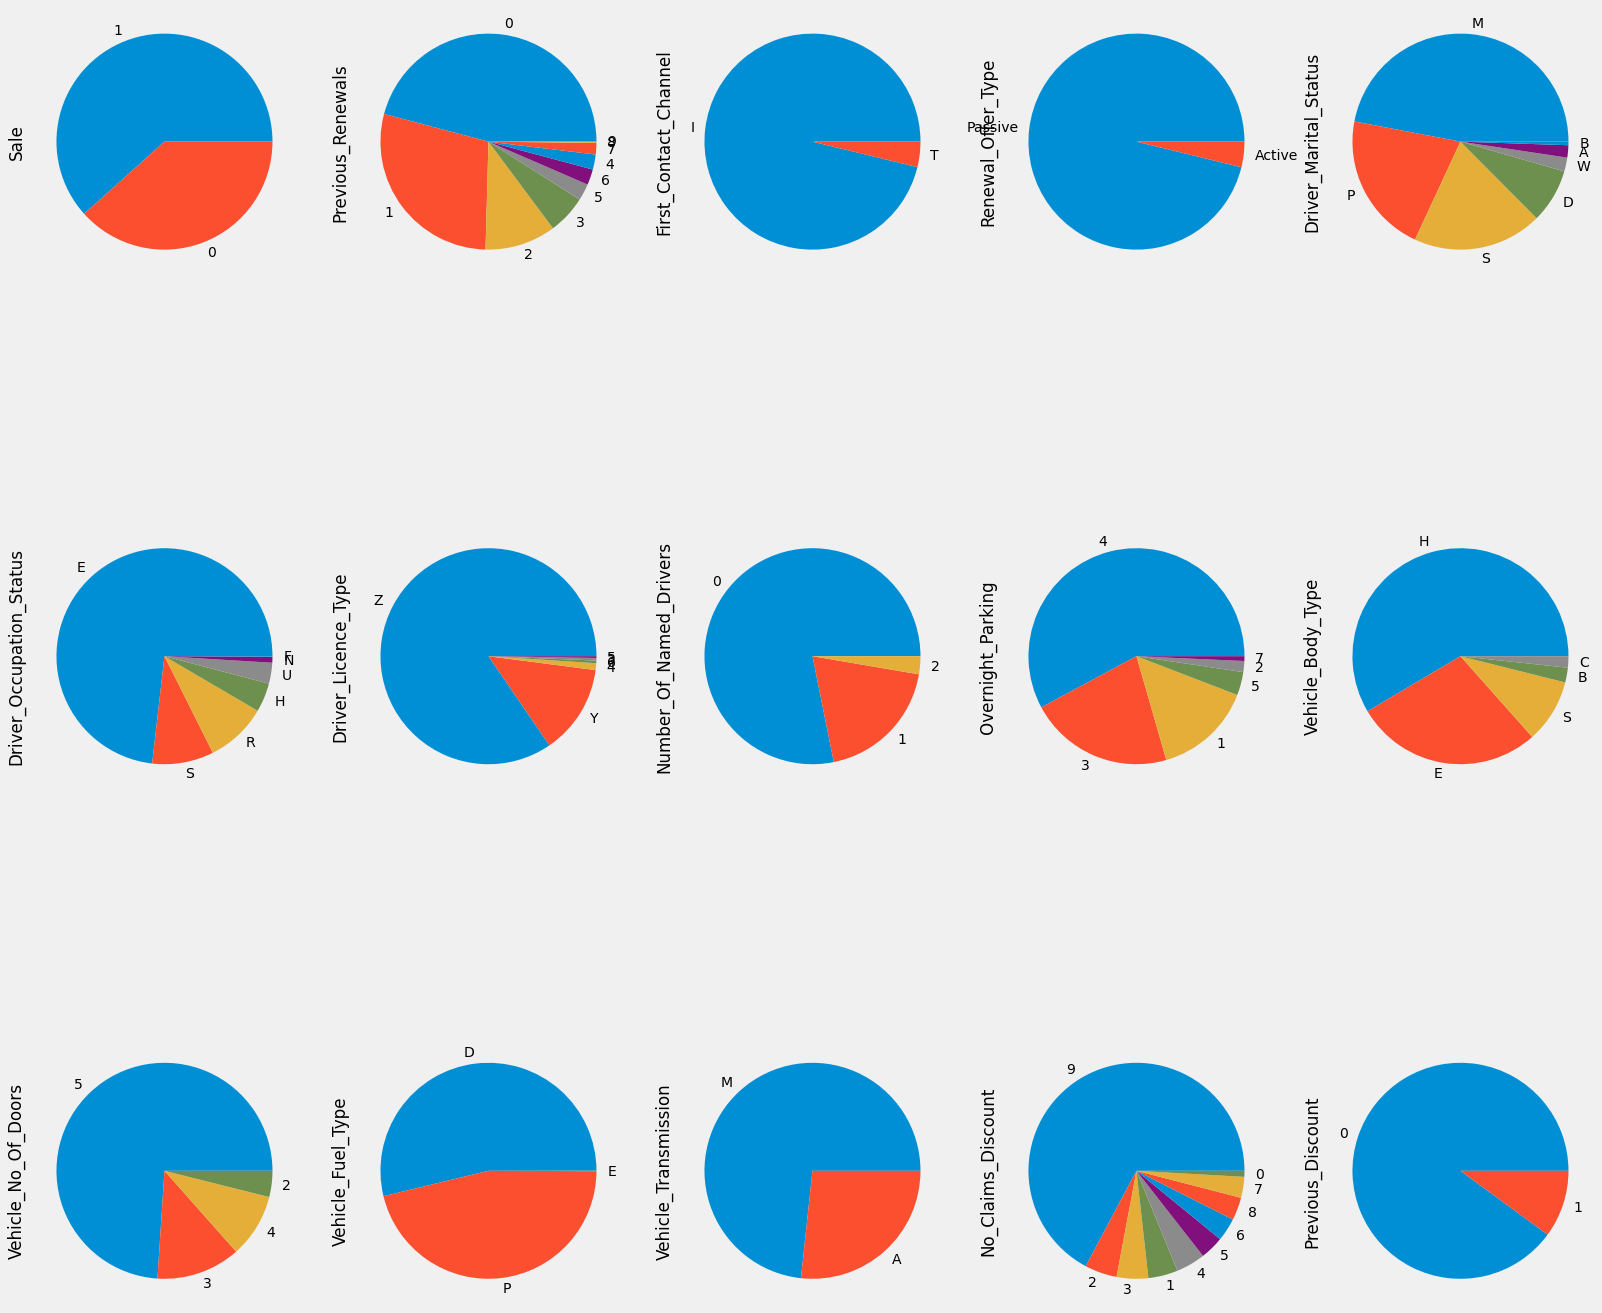

In [91]:
plt.figure(figsize=(25,25))
for i in range(len(cat)):
    plt.subplot(3,5,i+1)
    df[cat[i]].value_counts().plot.pie()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

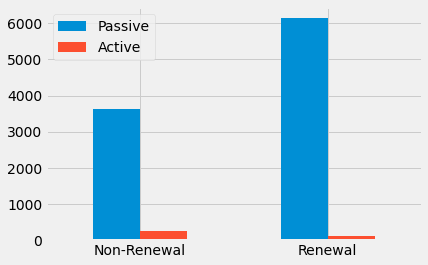

In [76]:
def barplot(variable):
    aa=pd.concat([df[df['Sale']==0][variable].value_counts(),df[df['Sale']==1][variable].value_counts()],axis=1)
    aa.columns=['Non-Renewal','Renewal']
    aa.T.plot.bar()
barplot('Renewal_Offer_Type')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

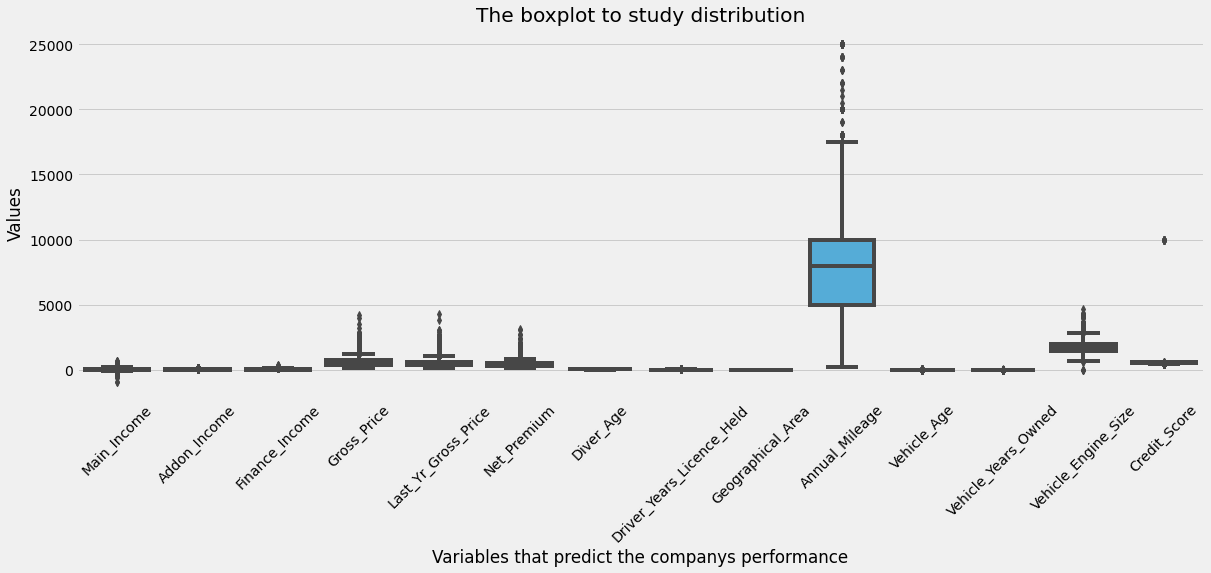

In [77]:
plt.figure(figsize=(18,14))
plt.subplot(2,1,1)
sns.boxplot(data=df[num])
plt.title('The boxplot to study distribution')
plt.xlabel('Variables that predict the companys performance')
plt.ylabel('Values')
plt.xticks(rotation=45)

In [78]:
df_numflo=pd.concat([df['Sale'],df[num]],axis=1)

sale = df_numflo[df_numflo.Sale==1].mean().to_frame()[1:]
nonsale = df_numflo[df_numflo.Sale==0].mean().to_frame()[1:]
total=sale+nonsale
aa=pd.concat([sale,nonsale,total],axis=1)
aa.columns=['sale','nonsale','total']
aa['sale_per'] = aa.sale*100/aa.total
aa['nonsale_per'] = aa.nonsale*100/aa.total
aa

,sale,nonsale,total,sale_per,nonsale_per
Main_Income,61.930073,67.623922,129.553995,47.802519,52.197481
Addon_Income,24.021789,25.650266,49.672055,48.360771,51.639229
Finance_Income,40.413529,40.015612,80.429141,50.247371,49.752629
Gross_Price,577.123748,659.450474,1236.574222,46.671177,53.328823
Last_Yr_Gross_Price,526.284493,560.547633,1086.832125,48.423715,51.576285
Net_Premium,398.924662,466.882062,865.806724,46.075487,53.924513
Diver_Age,48.322431,46.917158,95.239590,50.737757,49.262243
Driver_Years_Licence_Held,20.024410,19.579123,39.603533,50.562181,49.437819
Geographical_Area,6.551372,6.379328,12.930700,50.665254,49.334746
Annual_Mileage,7777.593491,8021.697358,15799.290849,49.227485,50.772515


In [79]:
list_sale= aa.sale_per.tolist()
tuple_sale = tuple(list_sale)
tuple_nonsale = tuple(aa.nonsale_per.tolist())

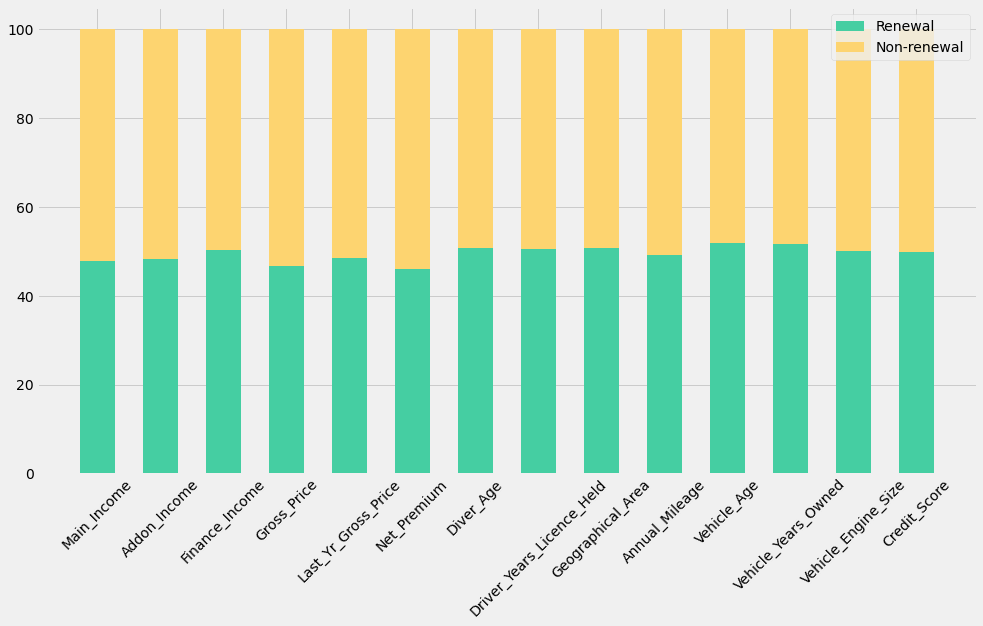

In [80]:
plt.figure(figsize=(15,8))
N=14
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple_sale, width, color='#45cea2')
p2 = plt.bar(ind, tuple_nonsale, width,bottom=tuple_sale,color='#fdd470')
plt.xticks(ind,tuple(aa.index.tolist() ))
plt.xticks(rotation=45)
plt.legend((p1[0], p2[0]), ('Renewal', 'Non-renewal'))
plt.show()

df['IPO']=df['Sale']*(df['Main_Income']+df['Addon_Income']+df['Finance_Income'])

Text(0.5, 1.0, 'Main distribution of Main_Income')

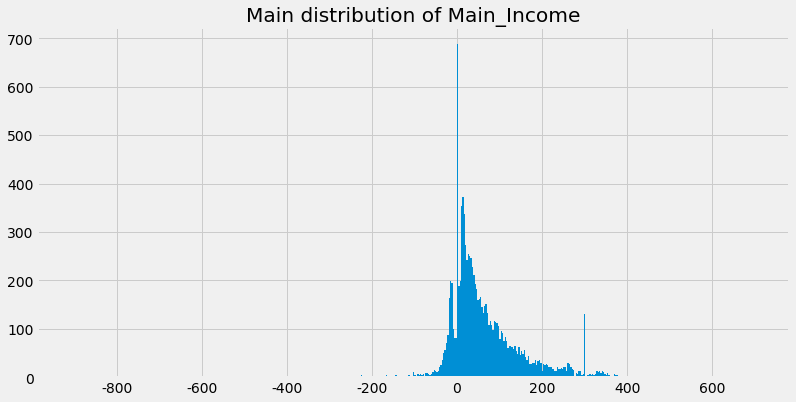

In [81]:
#df['IPO']=  (df['Main_Income']+df['Addon_Income']+df['Finance_Income'])
df['Main_Income'].hist(bins=500,figsize=(12,6))
plt.title('Main distribution of Main_Income')

#df=df.drop(['IPO'],axis=1)

Text(0.5, 1.0, 'Main distribution of Vehicle_Age')

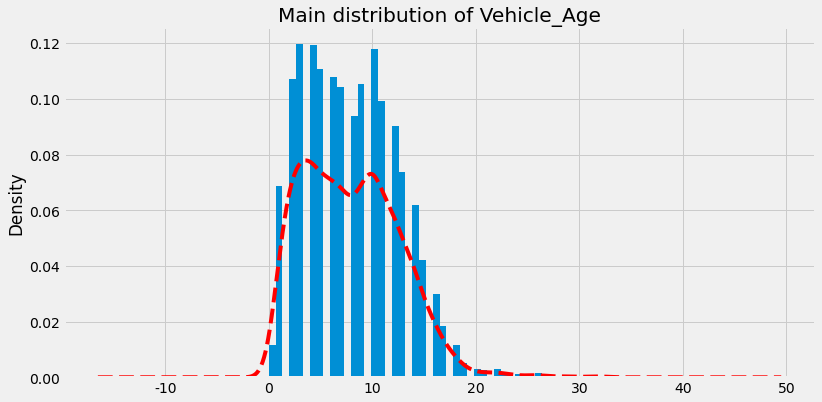

In [82]:
ax1=df['Vehicle_Age'].hist(stacked=True, bins=50,density=1,figsize=(12,6))
df['Vehicle_Age'].plot.density(style='g--',c='r',ax=ax1)  
plt.title('Main distribution of Vehicle_Age')

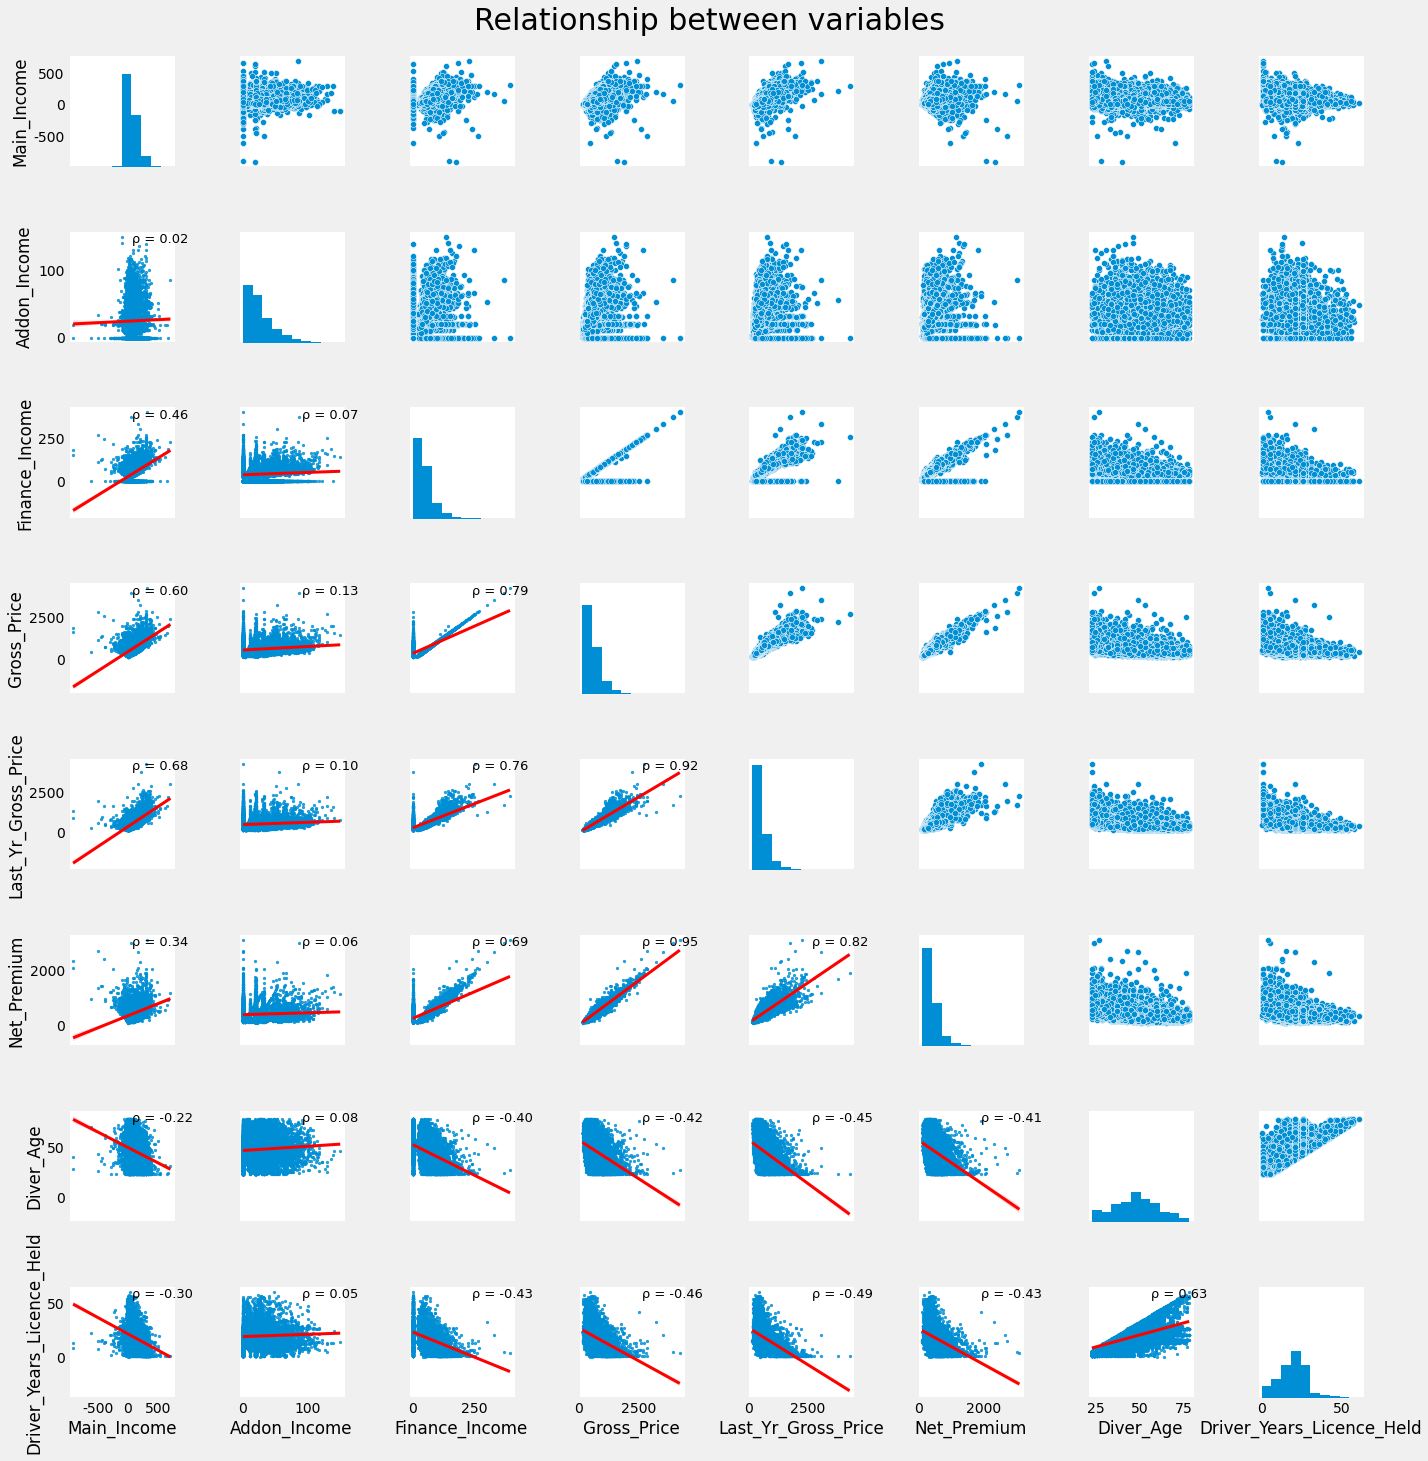

In [83]:
BGL = df[['Main_Income','Addon_Income','Finance_Income','Gross_Price','Last_Yr_Gross_Price','Net_Premium','Diver_Age','Driver_Years_Licence_Held']]
BGL.head()
plt.rcParams.update({'axes.facecolor':'white',"grid.linestyle": " "})
def correlation(x, y, **kwargs):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("ρ = {:.2f}".format(r), xy=(0.6, 0.9), xycoords=ax.transAxes, size = 13)

 

image = sns.PairGrid(BGL, diag_sharey=True)
image.map_diag(plt.hist) 
image.map_upper(sns.scatterplot)
image.map_lower(sns.regplot, 
              scatter_kws={'s':5},
              line_kws={'lw': 3,'color':'red'}) 
image.map_lower(correlation)
image.fig.suptitle("Relationship between variables", y=1.015, fontsize= 30, fontweight= "regular")

 

 

 

plt.show()
 

 

plt.show()

### Segmentation

#### hierarchical Clustering

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

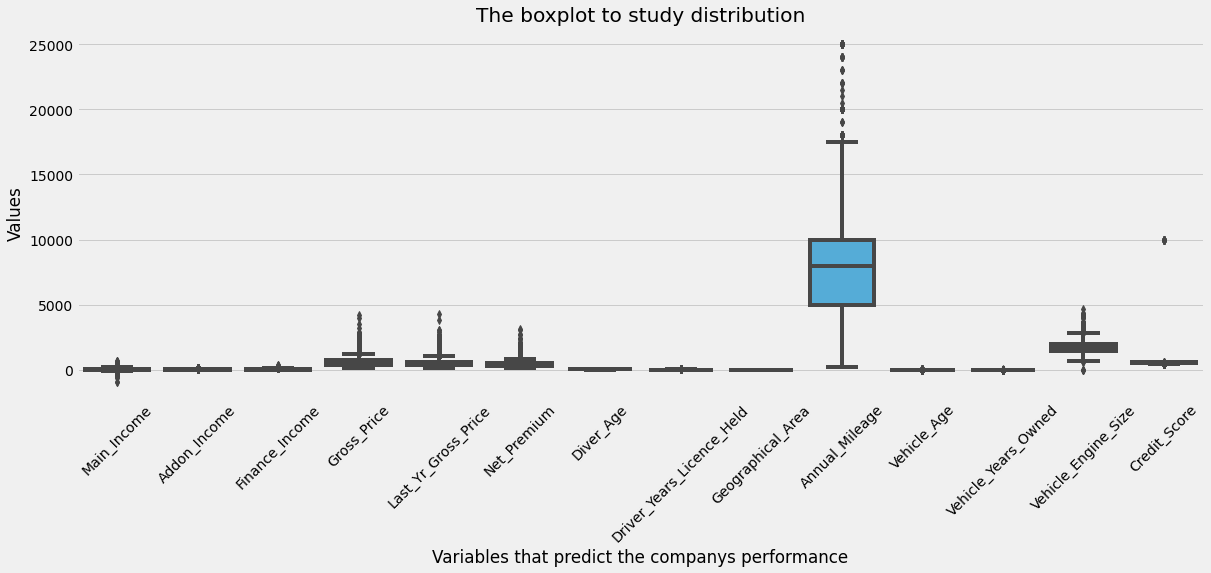

In [ ]:
plt.figure(figsize=(18,14))
plt.subplot(2,1,1)
sns.boxplot(data=df[num])
plt.title('The boxplot to study distribution')
plt.xlabel('Variables that predict the companys performance')
plt.ylabel('Values')
plt.xticks(rotation=45)

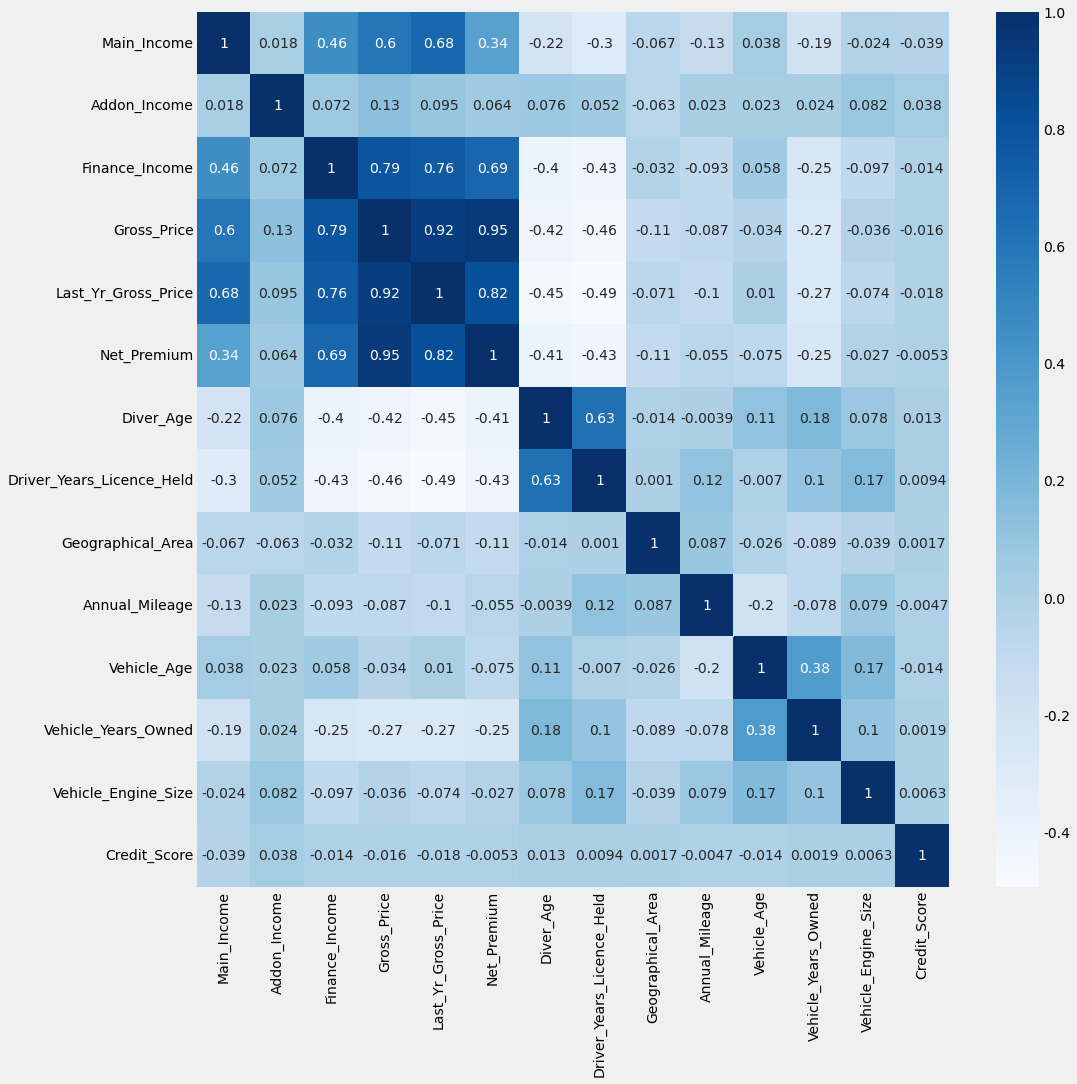

In [ ]:
#check and avoid highly correlated variables
plt.figure(figsize=(15,15))
sns.heatmap(df[num].corr(), annot=True, cmap='Blues')
plt.show()


# [Gross_Price, Last_Yr_Gross_Price, Net_Premium] highly correlated (>0.90)
# [Gross_Price, Last_Yr_Gross_Price, Finance_Income] highly correlated (>0.75）
#              [Last_Yr_Gross_Price, Net_Premium] highly correlated (=0.82)
# [Net_Premium, Finance_Income] moderately correlated (0.69)

# remove Gross_Price, Last_Yr_Gross_Price,
# Keep Finance_Income, Net_Premium


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


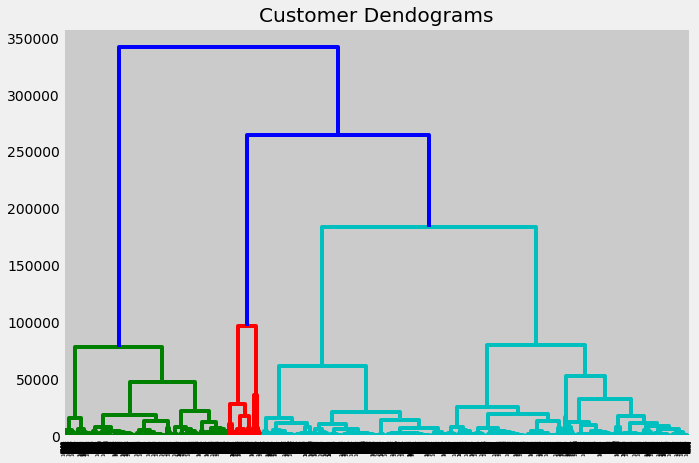

In [ ]:
#also drop Geographical_Area
df_cluster=df[num].drop(columns=['Gross_Price', 'Last_Yr_Gross_Price', 'Geographical_Area'])

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_cluster, method='ward'))

In [ ]:
#best choice of clusters: 4, as the inter-cluster distance is largest
cluster_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierachical_clusters=cluster_4.fit_predict(df_cluster)

#add hierarchical clusters into df_cluster
df_cluster['h_cluster'] = hierachical_clusters

In [ ]:
df_cluster[df_cluster['h_cluster']==0].describe()

,Main_Income,Addon_Income,Finance_Income,Net_Premium,Diver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Engine_Size,Credit_Score,h_cluster
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.0
mean,47.130249,27.654981,35.007811,417.340071,48.969751,22.475089,16899.017794,6.297153,2.658363,1819.016014,562.886121,0.0
std,77.453076,21.958757,37.968696,206.442172,10.342657,7.626550,3286.354739,4.167905,2.383247,382.287073,28.314780,0.0
min,-499.930000,0.000000,0.000000,149.800000,23.000000,1.000000,12784.000000,0.000000,0.000000,0.000000,450.000000,0.0
25%,0.925000,9.882500,0.000000,289.062500,43.000000,19.000000,14999.000000,3.000000,1.000000,1560.000000,551.000000,0.0
50%,30.745000,25.794900,35.050000,361.615000,49.000000,22.000000,15000.000000,5.000000,2.000000,1910.000000,566.000000,0.0
75%,79.650000,39.088900,57.787500,478.987500,56.000000,26.000000,19999.000000,10.000000,4.000000,1995.000000,581.000000,0.0
max,337.640000,138.373800,304.810000,2336.850000,75.000000,49.000000,25000.000000,24.000000,19.000000,4163.000000,621.000000,0.0


In [ ]:
#Visulize characteristic of clusters

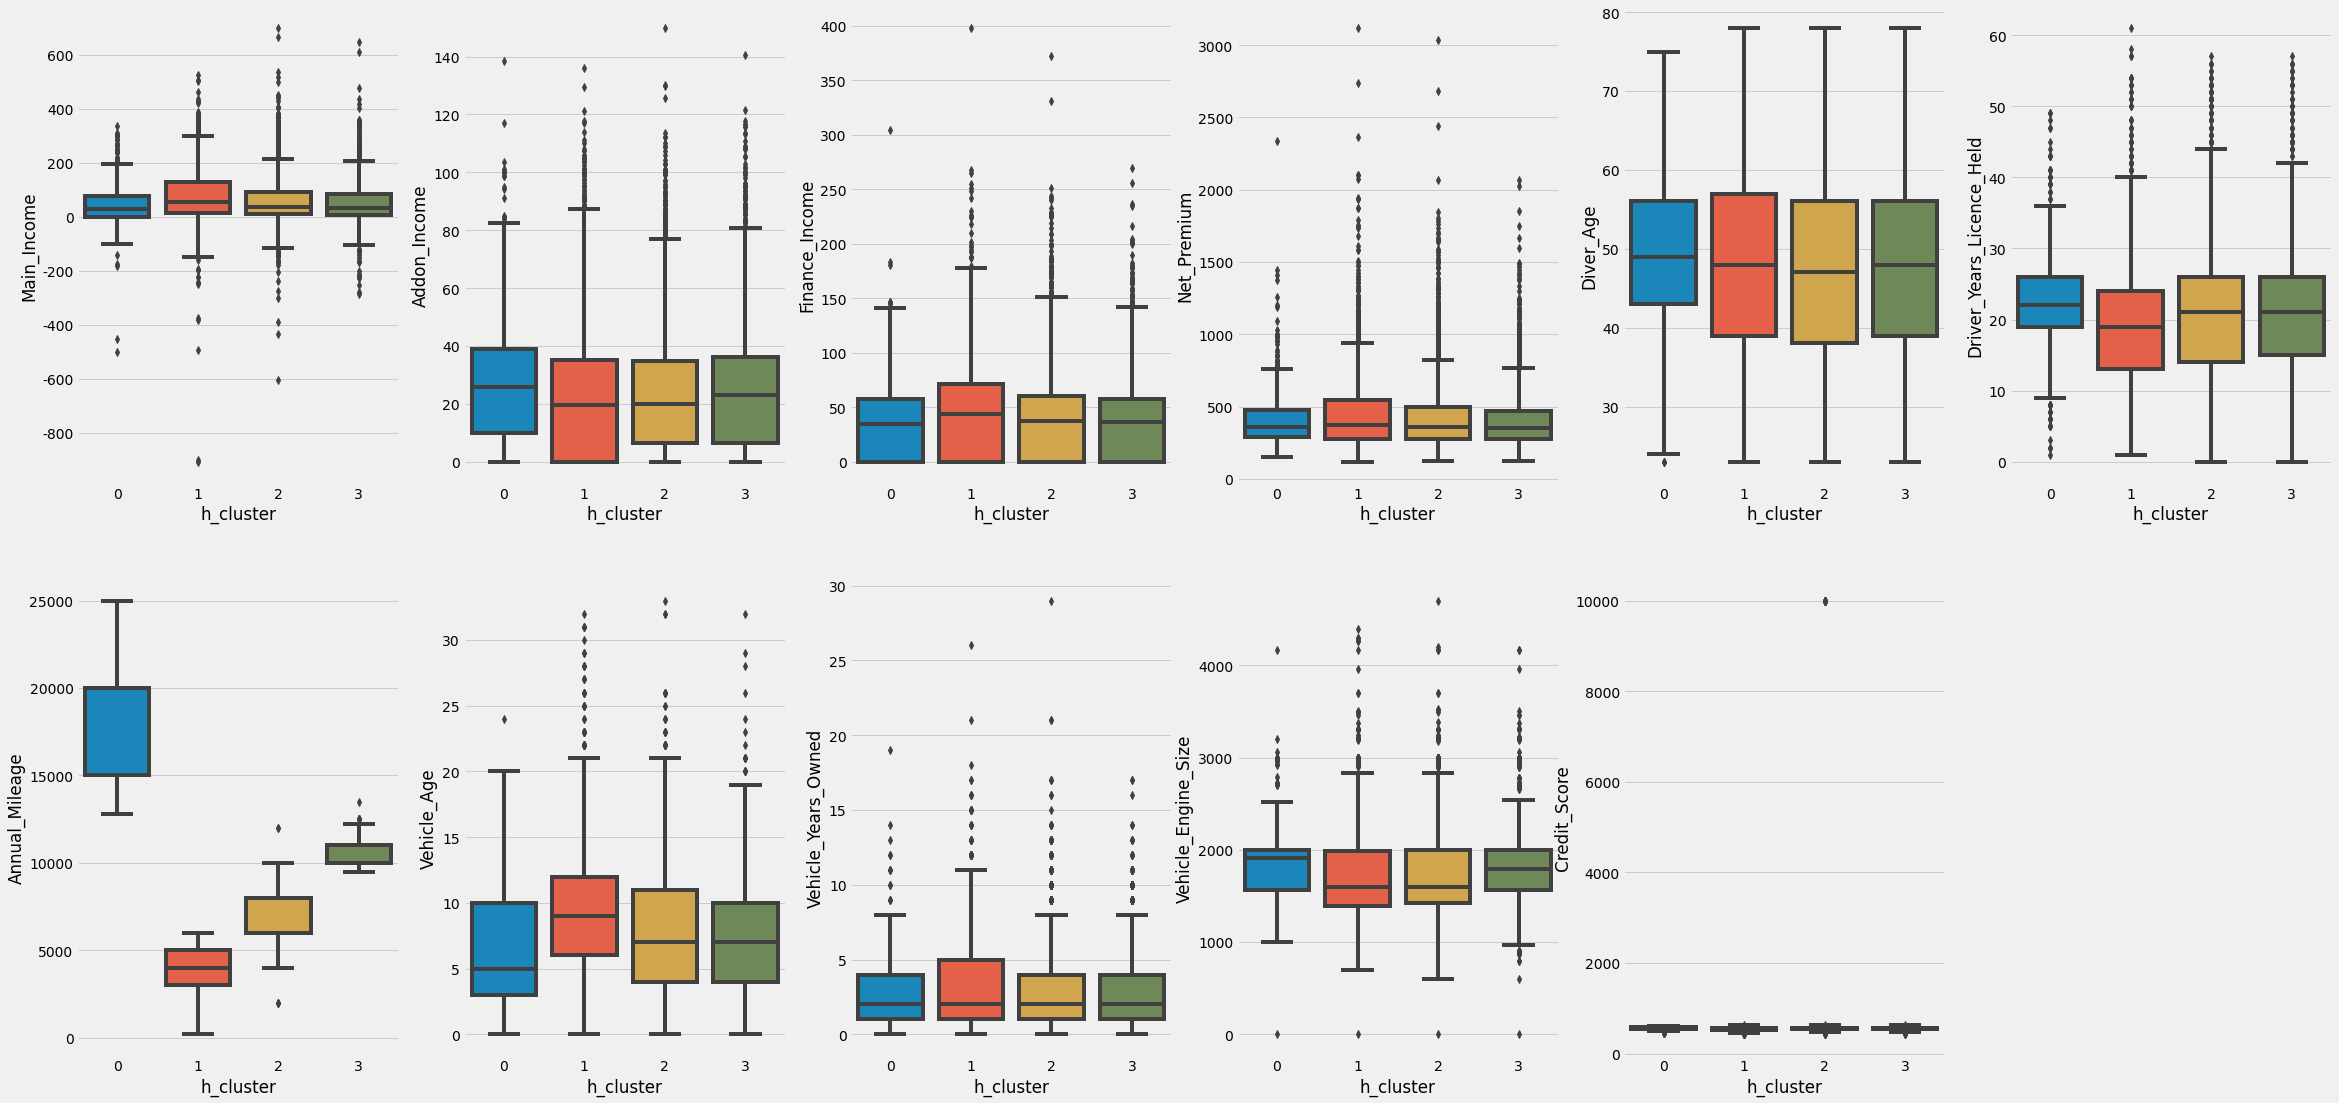

In [ ]:
plt.figure(figsize=(36,18))

for i in range(11):
    plt.subplot(2,6,(i+1))
    sns.boxplot(y=df_cluster.iloc[:,i], data=df_cluster, x='h_cluster')

#### K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

df_km=df_cluster.iloc[:,:-1]

#scaled df
scaled_features = StandardScaler().fit_transform(df_km.values)
scaled_df_km = pd.DataFrame(scaled_features, index=df_km.index, columns=df_km.columns)

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


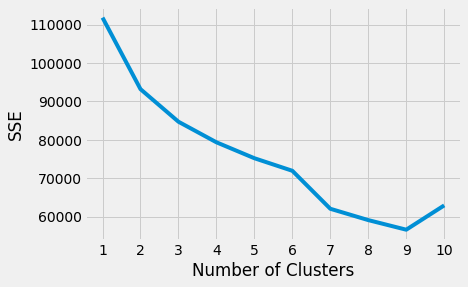

7


In [ ]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

#Plot SSE when different number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#see where is the elbow(best number of clusters)


from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

#optimal number of cluster = 7

In [ ]:
#scaled features
kmeans = KMeans(n_clusters=7, **kmeans_kwargs)
k_clusters=kmeans.fit_predict(scaled_features)

In [ ]:
df_km['k_cluster']=k_clusters

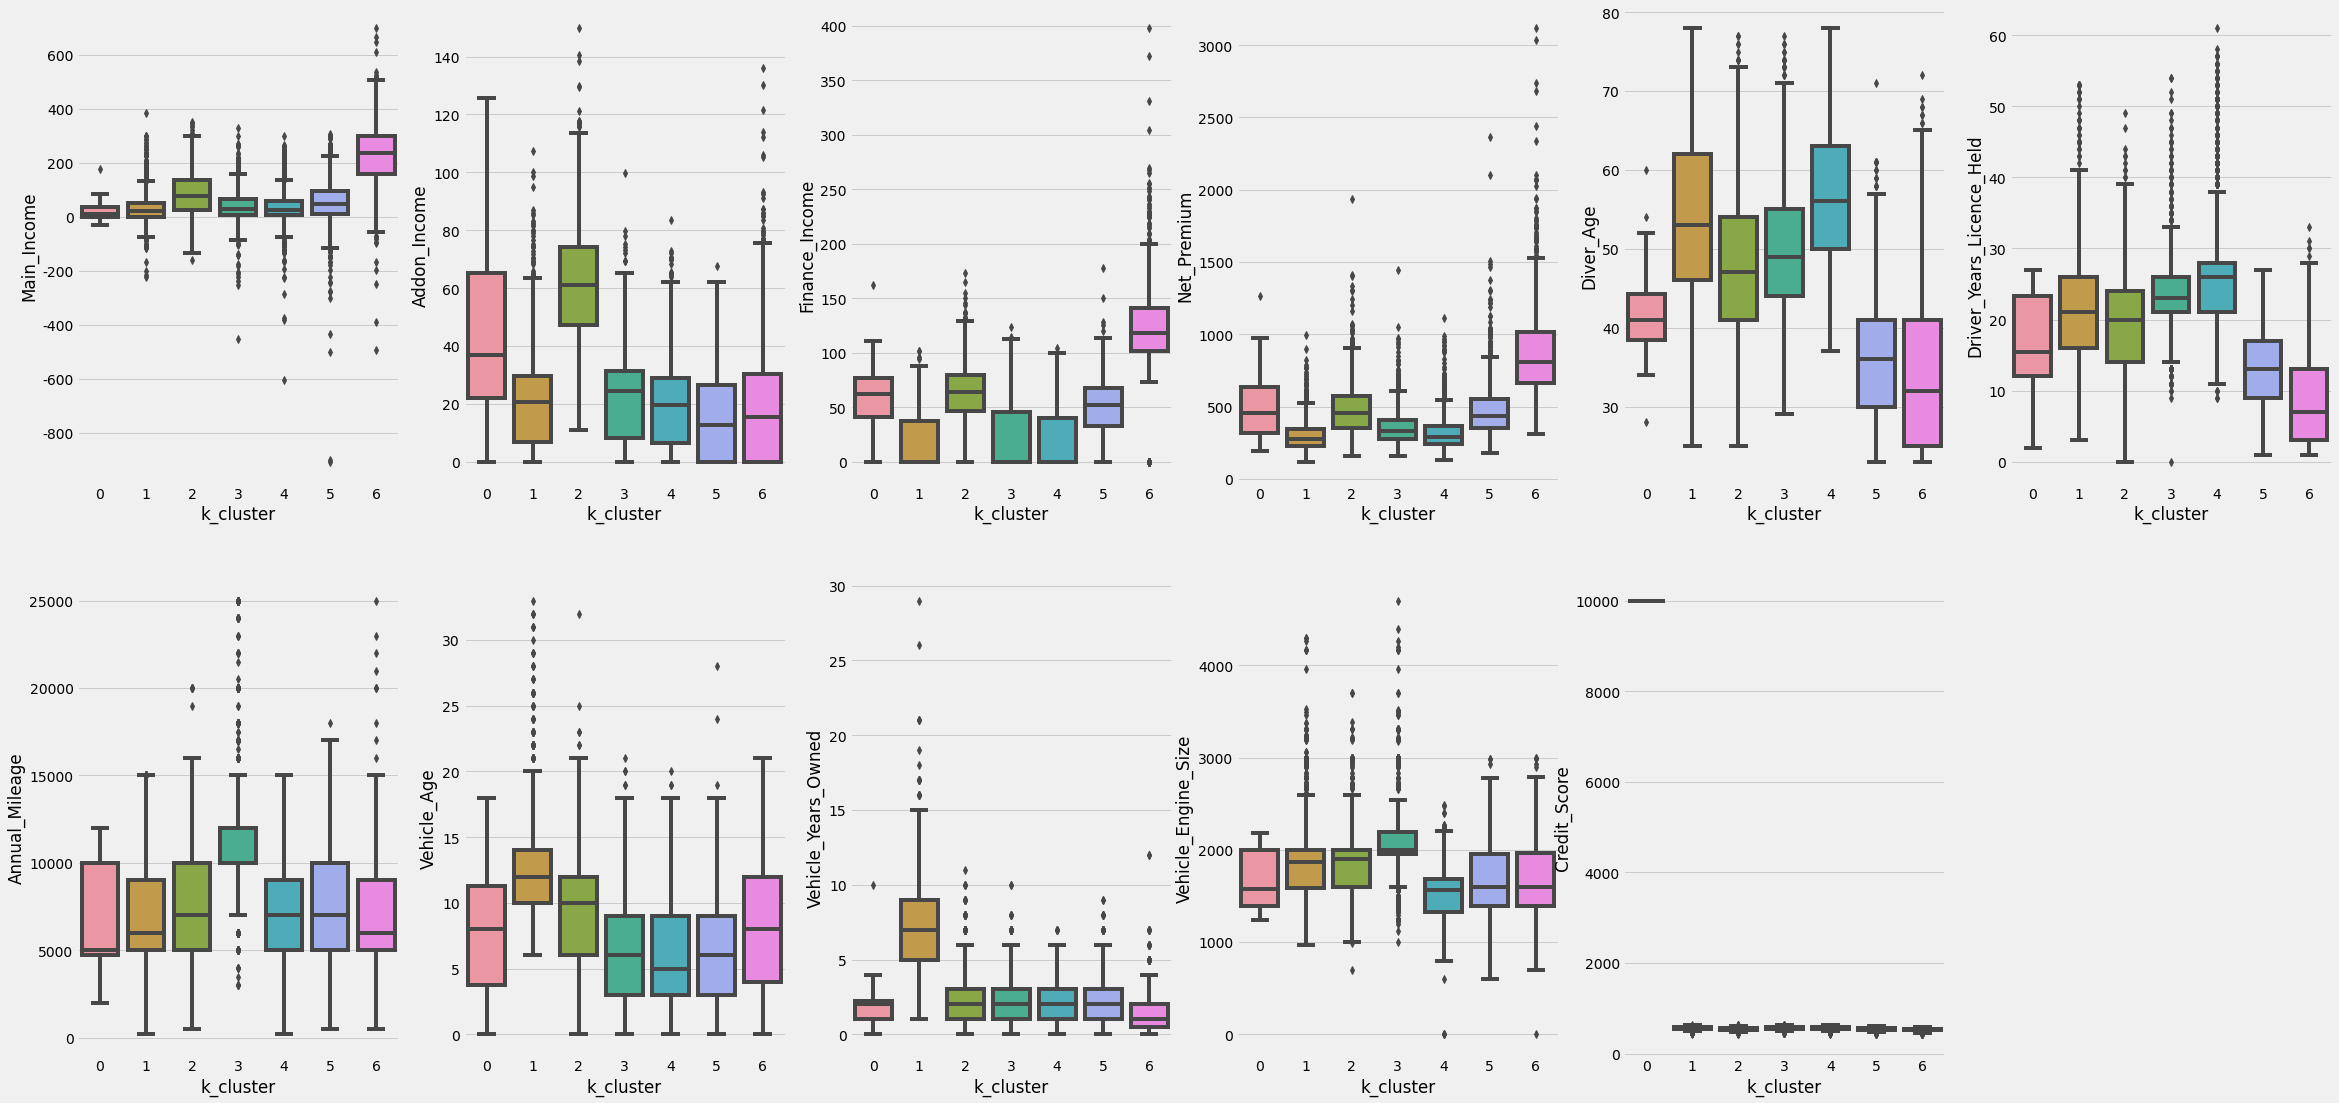

In [ ]:
#visulization of k-mean clusters

plt.figure(figsize=(36,18))

for i in range(11):
    plt.subplot(2,6,(i+1))
    sns.boxplot(y=df_km.iloc[:,i], data=df_km, x='k_cluster')


In [ ]:
#for Credit_score in cluster 0, accounts have 9999 credit score
df_km[df_km['k_cluster']==0].head(8)

,Main_Income,Addon_Income,Finance_Income,Net_Premium,Diver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Engine_Size,Credit_Score,k_cluster
350,176.23,64.7900,62.76,279.59,37,15,5000,14,2,1360,9999,0
663,-4.65,0.0000,111.12,977.33,52,12,2000,12,1,1997,9999,0
803,25.45,19.0900,42.48,327.26,45,14,5000,3,2,1242,9999,0
1007,0.00,45.9634,53.29,438.89,39,13,6000,2,2,1560,9999,0
1272,70.24,35.3800,0.00,194.26,44,26,10000,18,3,1896,9999,0
1365,36.12,93.5834,96.97,748.39,35,9,2000,13,1,1299,9999,0
1383,23.91,31.1000,61.81,478.24,39,21,4999,7,3,1461,9999,0
3304,0.00,0.0000,68.76,602.08,41,16,5000,5,1,1598,9999,0


In [ ]:
# in terms of interpretation, it's better to use Kmeans rather than hierarchical

1. calculate IPO for each cluster, see which cluster provide the best IPO 
    -> provide incentives, as they are revenue-generating customers
2. calculate churn rate for each cluster
    -> targeted marketing to deduce low churn rates


In [ ]:
from operator import ipow

def calculate_ipo(df, sale, main, addon, finance):
    ipo=df[sale]*(df[main]+df[addon]+df[finance])
    return ipo

def clusters_cr_ipo(df):
    for i in range(7):
        cluster=df[df['k_cluster']==i]
        sale_rate=cluster[cluster['Sale']==1].shape[0]/cluster.shape[0]
        ipo=df_ipo.apply(calculate_ipo, axis=1, args=('Sale', 'Main_Income', 'Addon_Income','Finance_Income')).sum()
        ipo_avg=ipo*sale_rate
        return ipo_avg

In [ ]:
df['k_cluster']=k_clusters
df_ipo=df[['Sale', 'Main_Income', 'Addon_Income','Finance_Income', 'k_cluster']]

In [ ]:
for i in range (7):
    cluster=df_ipo[df_ipo['k_cluster']==i]
    ppl=cluster.shape[0]
    ipo=cluster.apply(calculate_ipo, axis=1, args=('Sale', 'Main_Income', 'Addon_Income','Finance_Income')).sum()
    ipo_avg=ipo/ppl
    retention_rate=cluster[cluster['Sale']==1].shape[0]/ppl
    print(i,ipo_avg,retention_rate)

0 67.76424999999999 0.625
1 50.423594743276276 0.6644254278728606
2 127.62138746987952 0.5951807228915663
3 52.643302247191016 0.6129213483146068
4 47.628858524590164 0.6364754098360655
5 70.13036035865974 0.5965077866918358
6 205.2273791621912 0.560687432867884


In [ ]:
df_ipo[df_ipo['k_cluster']==6].sum()

Sale                 522.000
Main_Income       207324.510
Addon_Income       17299.066
Finance_Income    114521.240
k_cluster           5586.000
dtype: float64

----------

### Propensity model (Decision tree)

In [16]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, cross_val_score # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pydotplus

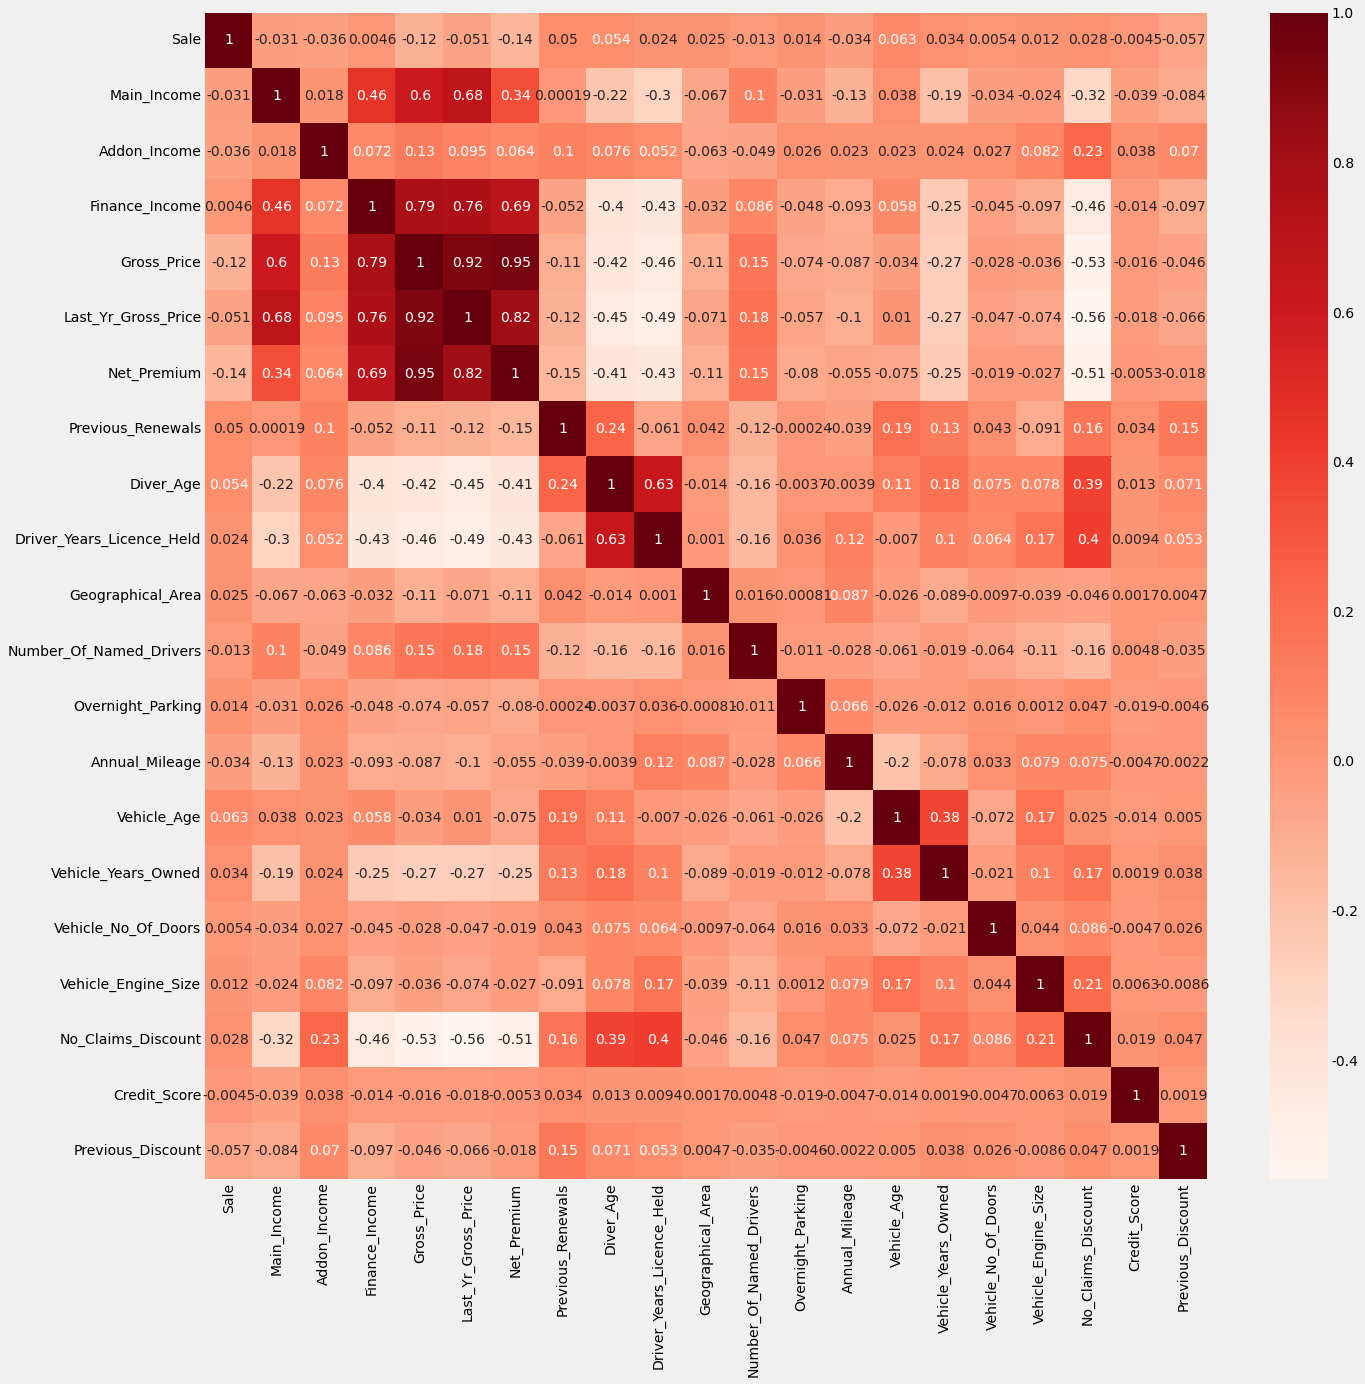

In [17]:
#Using Pearson Correlation
# Exclude Net_Premium & Last_Yr_Gross_Price as highly correlated to Gross_price

plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
# Convert categorical variables to numeric
def convert_cat(df,col):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    for c in col:
        item_list = df[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df[c].replace(d, inplace=True)
    return df

columns = df.select_dtypes(include='object').columns.tolist() #Select only object(categorical) columns
df_dt = copy.deepcopy(df)
convert_cat(df_dt,columns)

First_Contact_Channel
{'I': 0, 'T': 1}
Renewal_Offer_Type
{'Passive': 0, 'Active': 1}
Driver_Marital_Status
{'M': 0, 'D': 1, 'S': 2, 'P': 3, 'A': 4, 'B': 5, 'W': 6}
Driver_Occupation_Status
{'E': 0, 'U': 1, 'R': 2, 'S': 3, 'H': 4, 'N': 5, 'F': 6}
Driver_Licence_Type
{'Z': 0, '5': 1, 'Y': 2, '4': 3, '6': 4, '3': 5}
Vehicle_Body_Type
{'H': 0, 'E': 1, 'S': 2, 'B': 3, 'C': 4}
Vehicle_Fuel_Type
{'P': 0, 'D': 1, 'E': 2}
Vehicle_Transmission
{'M': 0, 'A': 1}


,Sale,Main_Income,Addon_Income,Finance_Income,Gross_Price,Last_Yr_Gross_Price,Net_Premium,Previous_Renewals,First_Contact_Channel,Renewal_Offer_Type,...,Vehicle_Age,Vehicle_Years_Owned,Vehicle_Body_Type,Vehicle_No_Of_Doors,Vehicle_Engine_Size,Vehicle_Fuel_Type,Vehicle_Transmission,No_Claims_Discount,Credit_Score,Previous_Discount
0,1,35.37,0.0000,35.41,376.77,381.53,269.42,8,0,0,...,4,2,0,5,999,0,0,9,581,0
1,0,117.11,14.5566,41.77,444.66,408.65,242.61,8,0,0,...,14,3,0,3,1149,0,0,9,526,0
2,1,106.92,43.5370,61.08,649.08,538.19,398.45,8,0,0,...,2,1,0,5,1499,0,0,7,586,1
3,1,194.65,99.8576,70.20,746.76,743.49,299.46,8,0,0,...,15,5,1,5,2902,1,1,9,540,0
4,1,32.98,19.0900,0.00,303.93,310.12,224.23,7,1,0,...,17,8,0,3,1300,0,0,8,531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,0,60.72,65.9172,0.00,720.47,554.19,551.12,0,0,0,...,6,4,2,4,1968,1,1,9,600,0
10281,0,65.99,51.4462,54.96,584.17,510.79,378.77,0,0,0,...,6,4,0,5,1560,1,0,9,584,0
10282,1,8.98,25.1422,0.00,352.53,282.83,299.37,0,0,0,...,2,1,0,5,1197,0,0,9,581,0
10283,0,45.03,0.0000,70.68,751.60,551.19,562.93,0,0,0,...,4,1,0,5,1598,1,0,4,587,0


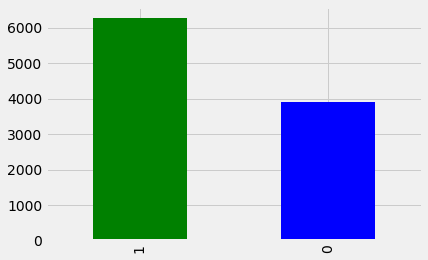

In [19]:
df_dt['Sale'].value_counts().plot(kind='bar',color = ['green', 'blue']) #Imbalance target variable

In [20]:
#df['Number_Of_Attempted_Policy_Ammendments'] =  df['Number_Of_Attempted_Policy_Ammendments'].fillna('0')

In [21]:
#split dataset in features and target variable

#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#df = df.select_dtypes(include=numerics) #Select only numeric columns
feature_cols = [i for i in df.columns if i not in ['Sale', 'Gross_Price', 'Last_Yr_Gross_Price', 'k_cluster']] #Remove columns 'Gross_Price', 'Last_Yr_Gross_Price'
X = df_dt[feature_cols] # Features
y = df_dt.Sale # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=feature_cols )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Sale'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no Sale in oversampled data",len(os_data_y[os_data_y['Sale']==0]))
print("Number of Sale",len(os_data_y[os_data_y['Sale']==1]))
print("Proportion of no Sale data in oversampled data is ",len(os_data_y[os_data_y['Sale']==0])/len(os_data_X))
print("Proportion of Sale data in oversampled data is ",len(os_data_y[os_data_y['Sale']==1])/len(os_data_X))

X_train = os_data_X
y_train = os_data_y

length of oversampled data is  8730
Number of no Sale in oversampled data 4365
Number of Sale 4365
Proportion of no Sale data in oversampled data is  0.5
Proportion of Sale data in oversampled data is  0.5


In [22]:
# Maximum Tree Depth

score_list = []
for max_depth in range(1, 50):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    Dt_Score = clf.score(X_test, y_test)
    print('With Max-Depth {}, the decision tree score : {}'.format(max_depth, round(Dt_Score, 4)))
    score_list.append(Dt_Score)
    
score_list = np.array(score_list)
max_depth = np.argmax(score_list)+1

print('\nThe maximum score {} can first be obtained at tree depth {}'\
      .format(np.max(score_list),max_depth))

max_depth = 13 # chosen so as to encompass more features

With Max-Depth 1, the decision tree score : 0.5084
With Max-Depth 2, the decision tree score : 0.6359
With Max-Depth 3, the decision tree score : 0.5542
With Max-Depth 4, the decision tree score : 0.5939
With Max-Depth 5, the decision tree score : 0.6106
With Max-Depth 6, the decision tree score : 0.5923
With Max-Depth 7, the decision tree score : 0.5801
With Max-Depth 8, the decision tree score : 0.5683
With Max-Depth 9, the decision tree score : 0.5667
With Max-Depth 10, the decision tree score : 0.5608
With Max-Depth 11, the decision tree score : 0.5651
With Max-Depth 12, the decision tree score : 0.5585
With Max-Depth 13, the decision tree score : 0.5729
With Max-Depth 14, the decision tree score : 0.5575
With Max-Depth 15, the decision tree score : 0.5615
With Max-Depth 16, the decision tree score : 0.5533
With Max-Depth 17, the decision tree score : 0.5654
With Max-Depth 18, the decision tree score : 0.5719
With Max-Depth 19, the decision tree score : 0.566
With Max-Depth 20, the

In [23]:
# Split ratio

max_list = np.where(score_list == np.max(score_list))[0] + 1


score_list = []
for split_num in range(1, 20):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth = max_depth,
                                        min_samples_leaf=split_num*0.01,
                                        min_samples_split=split_num*0.01)
    clf = clf.fit(X_train, y_train)
    Dt_Score = clf.score(X_test, y_test)
    print('Max-Depth {}, Split Ratio {}%, DT Score : {}'.format(max_depth, split_num, round(Dt_Score, 4)))
    score_list.append(Dt_Score)
        

score_list = np.array(score_list)
best_split = np.argmax(score_list) + 1

print('\nThe maximum score {} can be obtained at tree depth {} and split ratio {}%.'\
      .format(np.max(score_list),max_depth, best_split ))

best_split = 6

Max-Depth 13, Split Ratio 1%, DT Score : 0.6168
Max-Depth 13, Split Ratio 2%, DT Score : 0.6064
Max-Depth 13, Split Ratio 3%, DT Score : 0.6123
Max-Depth 13, Split Ratio 4%, DT Score : 0.606
Max-Depth 13, Split Ratio 5%, DT Score : 0.5847
Max-Depth 13, Split Ratio 6%, DT Score : 0.6205
Max-Depth 13, Split Ratio 7%, DT Score : 0.6205
Max-Depth 13, Split Ratio 8%, DT Score : 0.6201
Max-Depth 13, Split Ratio 9%, DT Score : 0.6198
Max-Depth 13, Split Ratio 10%, DT Score : 0.5939
Max-Depth 13, Split Ratio 11%, DT Score : 0.5939
Max-Depth 13, Split Ratio 12%, DT Score : 0.609
Max-Depth 13, Split Ratio 13%, DT Score : 0.6123
Max-Depth 13, Split Ratio 14%, DT Score : 0.6123
Max-Depth 13, Split Ratio 15%, DT Score : 0.571
Max-Depth 13, Split Ratio 16%, DT Score : 0.571
Max-Depth 13, Split Ratio 17%, DT Score : 0.571
Max-Depth 13, Split Ratio 18%, DT Score : 0.571
Max-Depth 13, Split Ratio 19%, DT Score : 0.571

The maximum score 0.6204523107177975 can be obtained at tree depth 13 and split rati

In [24]:
# Max Feature number

feature_num = X.shape[1]
#feature_num =df.shape[1]-1
score_list = []
for max_features in range(2, feature_num):
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=max_depth,
                                        min_samples_leaf=best_split*0.01,
                                        min_samples_split=best_split*0.01,
                                        max_features=max_features)
    clf = clf.fit(X_train, y_train)
    Dt_Score = clf.score(X_test, y_test)
    Dt_error = 1-Dt_Score
    print('Max-Depth {}, Split Ratio {}%, Feature Number {}, DT Score/Error : {}, {}'.format(max_depth,
                                                                                                 best_split, 
                                                                                                max_features, 
                                                                                                round(Dt_Score, 4),
                                                                                                round(Dt_error, 4)))
    score_list.append(Dt_Score)
    best_fnumber = np.argmax(score_list) + 2

print('\nThe maximum score {} can be first obtained at tree depth {}, split ratio {}% and feature number {}.'\
      .format(np.max(score_list),max_depth, best_split, best_fnumber))

best_fnumber = 20

Max-Depth 13, Split Ratio 6%, Feature Number 2, DT Score/Error : 0.5461, 0.4539
Max-Depth 13, Split Ratio 6%, Feature Number 3, DT Score/Error : 0.5585, 0.4415
Max-Depth 13, Split Ratio 6%, Feature Number 4, DT Score/Error : 0.5382, 0.4618
Max-Depth 13, Split Ratio 6%, Feature Number 5, DT Score/Error : 0.566, 0.434
Max-Depth 13, Split Ratio 6%, Feature Number 6, DT Score/Error : 0.587, 0.413
Max-Depth 13, Split Ratio 6%, Feature Number 7, DT Score/Error : 0.589, 0.411
Max-Depth 13, Split Ratio 6%, Feature Number 8, DT Score/Error : 0.5788, 0.4212
Max-Depth 13, Split Ratio 6%, Feature Number 9, DT Score/Error : 0.5713, 0.4287
Max-Depth 13, Split Ratio 6%, Feature Number 10, DT Score/Error : 0.5611, 0.4389
Max-Depth 13, Split Ratio 6%, Feature Number 11, DT Score/Error : 0.569, 0.431
Max-Depth 13, Split Ratio 6%, Feature Number 12, DT Score/Error : 0.5942, 0.4058
Max-Depth 13, Split Ratio 6%, Feature Number 13, DT Score/Error : 0.5831, 0.4169
Max-Depth 13, Split Ratio 6%, Feature Number

In [25]:
# Feature ranking
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=max_depth,
                                  min_samples_leaf=best_split*0.01,
                                  min_samples_split=best_split*0.01,
                                  max_features=best_fnumber)
clf = clf.fit(X_train, y_train)
Dt_Score = clf.score(X_test, y_test)
Dt_error = 1-Dt_Score
print('The best decision tree model we have obtained is the following:')
print('Max-Depth {}, Split Ratio {}%, Feature Number {}, DT Score/Error : {}, {}'.
      format(max_depth,best_split,best_fnumber,round(Dt_Score, 4),round(Dt_error, 4)))

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
#print(type(feat_importance))
print("Feature importance = " + str([round(i, 4) for i in feat_importance]))
#print(df.columns.values[:-1])
print(X_train.columns.values)

The best decision tree model we have obtained is the following:
Max-Depth 13, Split Ratio 6%, Feature Number 20, DT Score/Error : 0.6205, 0.3795
Feature importance = [0.0, 0.0, 0.0141, 0.0294, 0.0, 0.0, 0.0, 0.0, 0.0055, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009, 0.0, 0.0, 0.0048, 0.0, 0.0036, 0.0]
['Main_Income' 'Addon_Income' 'Finance_Income' 'Net_Premium'
 'Previous_Renewals' 'First_Contact_Channel' 'Renewal_Offer_Type'
 'Diver_Age' 'Driver_Marital_Status' 'Driver_Occupation_Status'
 'Driver_Licence_Type' 'Driver_Years_Licence_Held' 'Geographical_Area'
 'Number_Of_Named_Drivers' 'Overnight_Parking' 'Annual_Mileage'
 'Vehicle_Age' 'Vehicle_Years_Owned' 'Vehicle_Body_Type'
 'Vehicle_No_Of_Doors' 'Vehicle_Engine_Size' 'Vehicle_Fuel_Type'
 'Vehicle_Transmission' 'No_Claims_Discount' 'Credit_Score'
 'Previous_Discount']


In [26]:
alternative_fnumber = 20
alternative_depth = 13 #We need a larger maximum tree depth to admit more features
alternative_split = 6

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=alternative_depth,
                                  min_samples_leaf=alternative_split*0.01,
                                  min_samples_split=alternative_split*0.01,
                                  max_features=alternative_fnumber)
clf = clf.fit(X_train, y_train)
Dt_Score = clf.score(X_test, y_test)
Dt_error = 1 - Dt_Score
print('An alternative decision tree model is the following:')
print('Max-Depth {}, Split Ratio {}%, Feature Number {}, DT Score/Error : {}, {}'.
      format(alternative_depth,best_split,alternative_fnumber,round(Dt_Score, 4),round(Dt_error, 4)))

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature importance = " + str([round(i, 4) for i in feat_importance]))
#print(df.columns.values[:-1])
print(X_train.columns.values)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Decision_Tree_feature_compare.png")

An alternative decision tree model is the following:
Max-Depth 13, Split Ratio 6%, Feature Number 20, DT Score/Error : 0.6205, 0.3795
Feature importance = [0.0, 0.0, 0.0141, 0.0294, 0.0, 0.0, 0.0, 0.0, 0.0055, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009, 0.0, 0.0, 0.0048, 0.0, 0.0036, 0.0]
['Main_Income' 'Addon_Income' 'Finance_Income' 'Net_Premium'
 'Previous_Renewals' 'First_Contact_Channel' 'Renewal_Offer_Type'
 'Diver_Age' 'Driver_Marital_Status' 'Driver_Occupation_Status'
 'Driver_Licence_Type' 'Driver_Years_Licence_Held' 'Geographical_Area'
 'Number_Of_Named_Drivers' 'Overnight_Parking' 'Annual_Mileage'
 'Vehicle_Age' 'Vehicle_Years_Owned' 'Vehicle_Body_Type'
 'Vehicle_No_Of_Doors' 'Vehicle_Engine_Size' 'Vehicle_Fuel_Type'
 'Vehicle_Transmission' 'No_Claims_Discount' 'Credit_Score'
 'Previous_Discount']


True

In [34]:
Features_used = [i for (i, v) in zip(X_train.columns.values, feat_importance) if v]
count = 0
for i in zip(X_train.columns.values, feat_importance):
  print(count, i)
  count += 1
print("Features actually used in decision tree:\n", Features_used)

0 ('Main_Income', 0.0)
1 ('Addon_Income', 0.0)
2 ('Finance_Income', 0.014072187040591677)
3 ('Net_Premium', 0.029357007248826127)
4 ('Previous_Renewals', 0.0)
5 ('First_Contact_Channel', 0.0)
6 ('Renewal_Offer_Type', 0.0)
7 ('Diver_Age', 0.0)
8 ('Driver_Marital_Status', 0.0054537951366884375)
9 ('Driver_Occupation_Status', 0.0)
10 ('Driver_Licence_Type', 0.0)
11 ('Driver_Years_Licence_Held', 0.0)
12 ('Geographical_Area', 0.0)
13 ('Number_Of_Named_Drivers', 0.0)
14 ('Overnight_Parking', 0.0)
15 ('Annual_Mileage', 0.0)
16 ('Vehicle_Age', 0.0)
17 ('Vehicle_Years_Owned', 0.0)
18 ('Vehicle_Body_Type', 0.0)
19 ('Vehicle_No_Of_Doors', 0.0008684024268044161)
20 ('Vehicle_Engine_Size', 0.0)
21 ('Vehicle_Fuel_Type', 0.0)
22 ('Vehicle_Transmission', 0.004783677867859327)
23 ('No_Claims_Discount', 0.0)
24 ('Credit_Score', 0.0036072519657602683)
25 ('Previous_Discount', 0.0)
Features actually used in decision tree:
 ['Finance_Income', 'Net_Premium', 'Driver_Marital_Status', 'Vehicle_No_Of_Doors', '

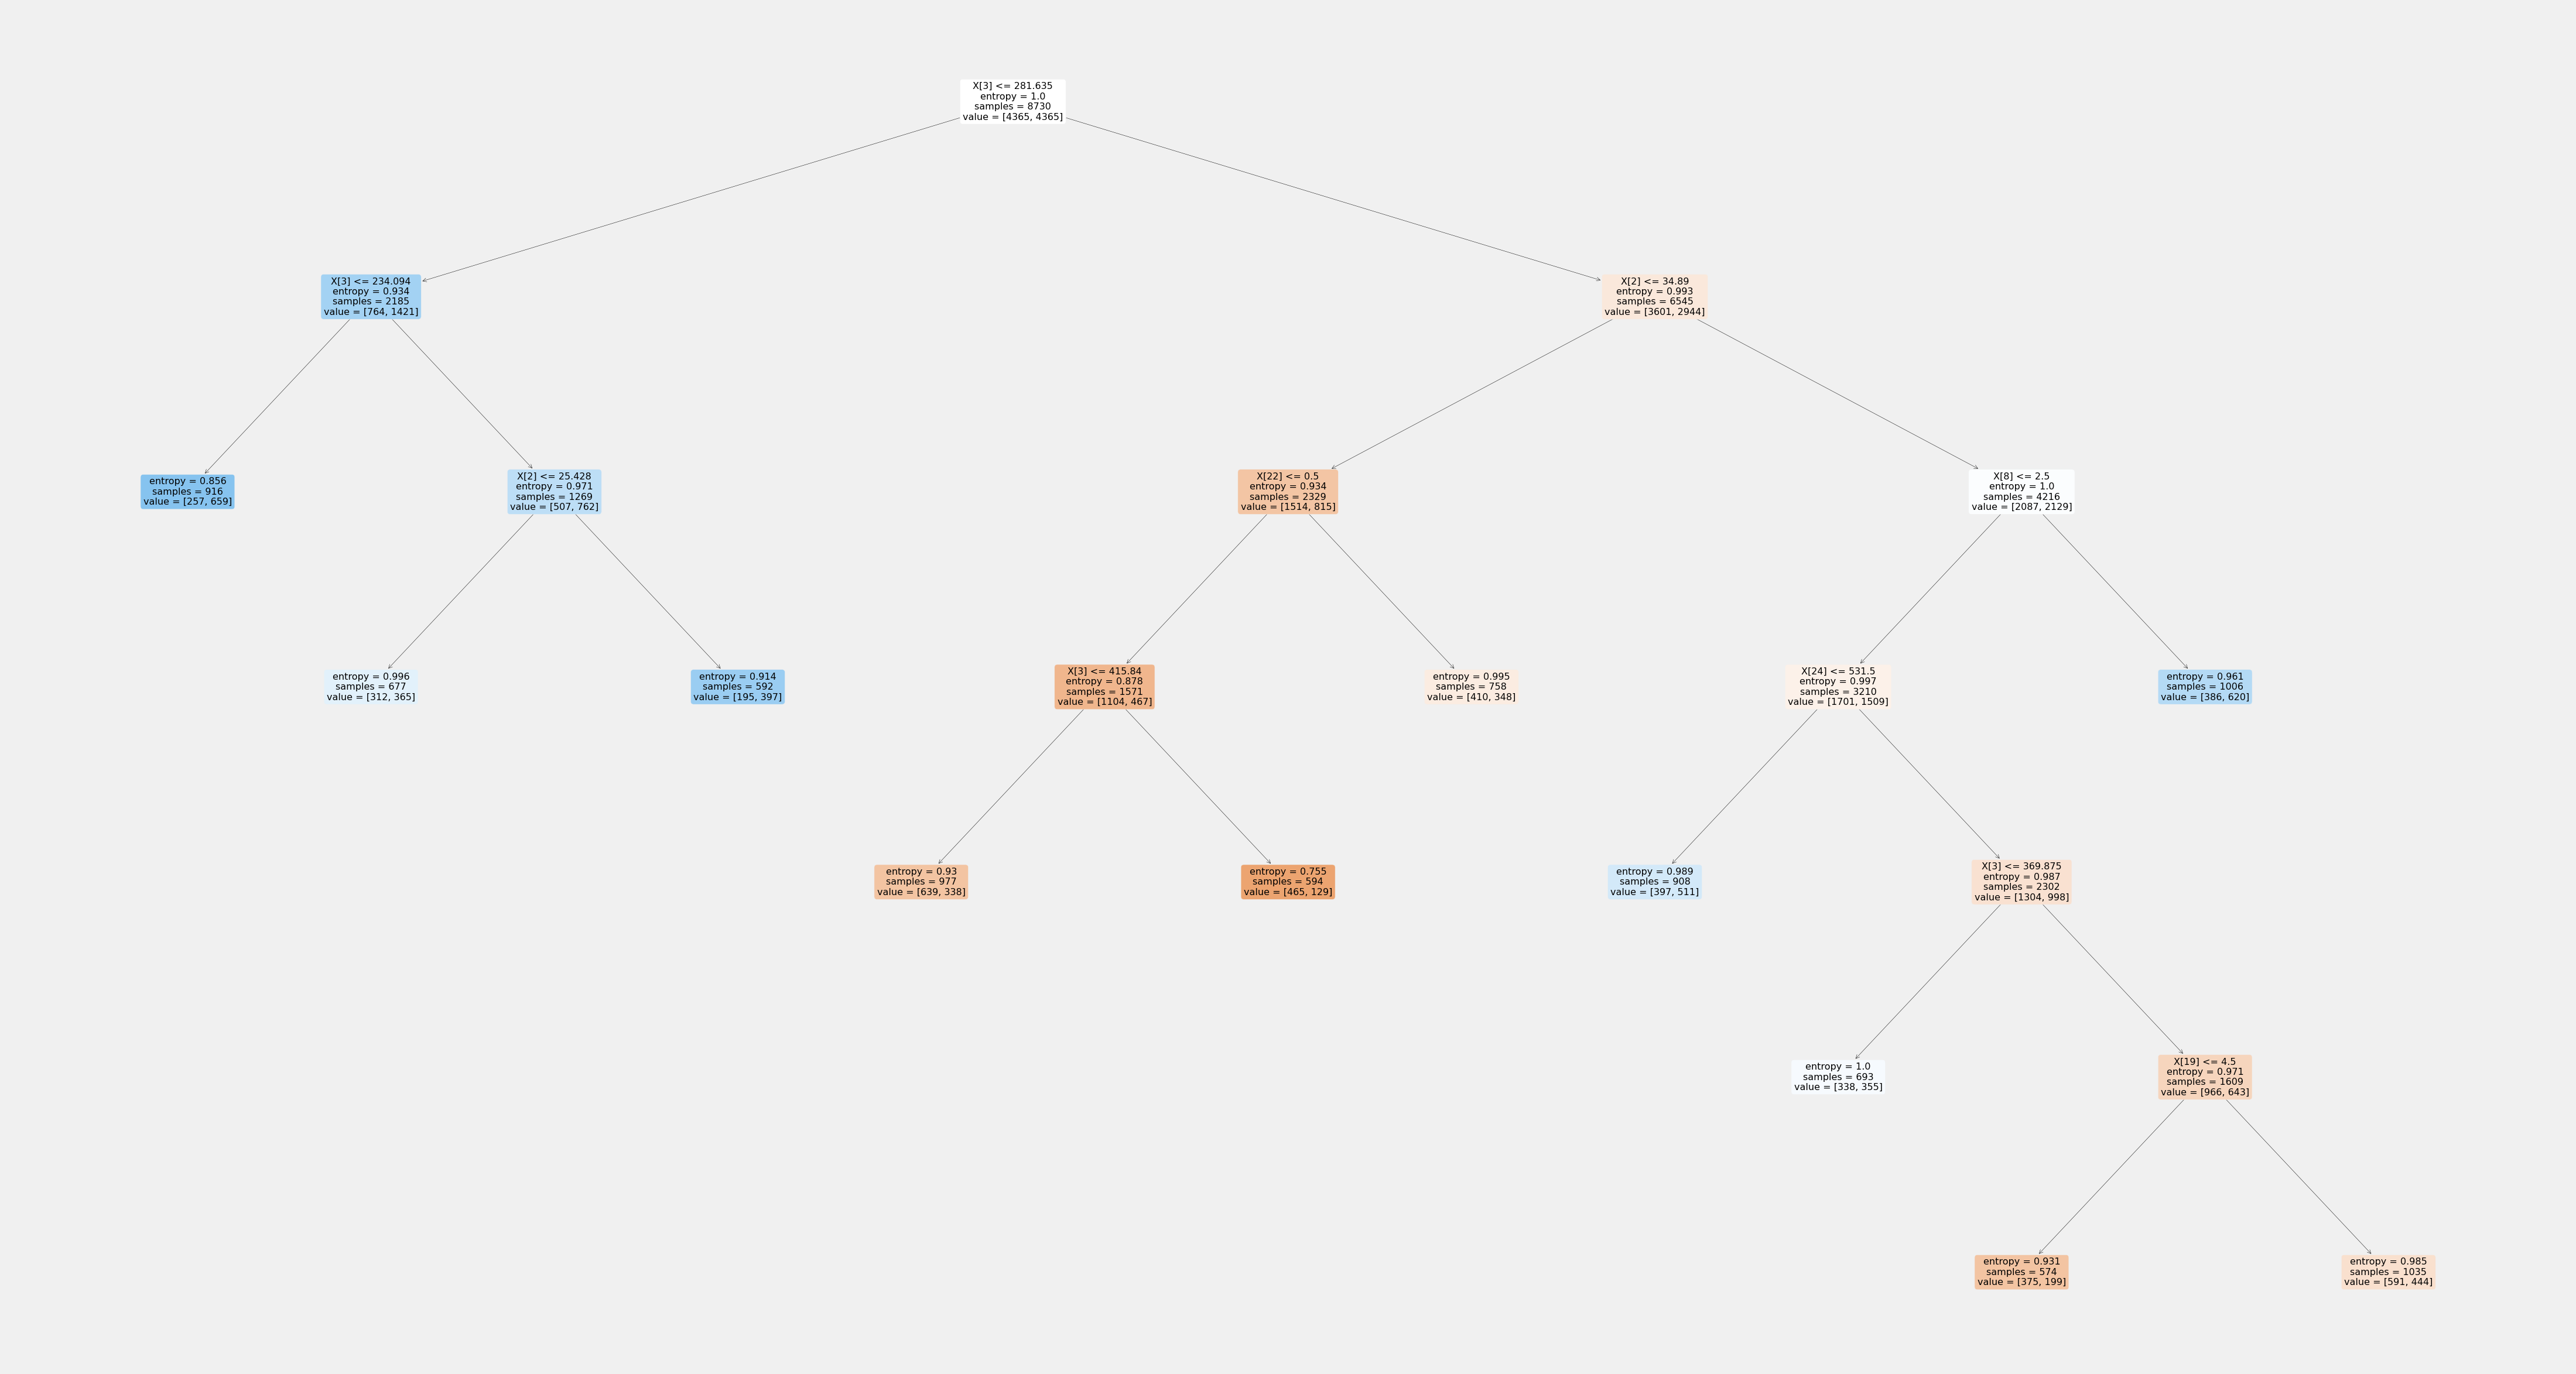

In [28]:
plt.figure(figsize = (70,40))
tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True);

Evalutation metrics
               precision    recall  f1-score   support

           0       0.50      0.56      0.53      1148
           1       0.71      0.65      0.68      1903

    accuracy                           0.62      3051
   macro avg       0.60      0.61      0.61      3051
weighted avg       0.63      0.62      0.62      3051

Confusion matrix
 [[ 647  501]
 [ 657 1246]]


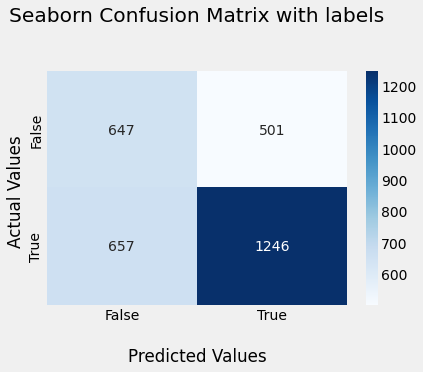

In [29]:
# Predicting value using test data
y_pred = clf.predict(X_test)
# Evalutation metrics
print("Evalutation metrics\n",metrics.classification_report(y_test, y_pred))
# Confustion mertics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt = '')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
from sklearn.metrics import fbeta_score, precision_score, recall_score

p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = fbeta_score(y_test, y_pred, beta=2.0)
print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

Result: p=0.713, r=0.655, f=0.666


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.638


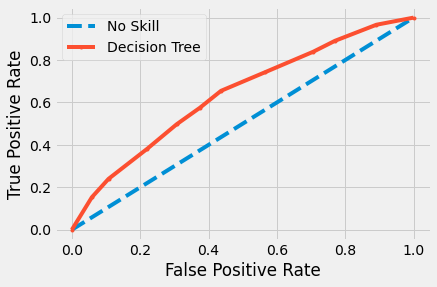

In [31]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Propensity model (logistic regression)

In [34]:
# Create dummy variable

df_lg = copy.deepcopy(df)

cat_vars=df.select_dtypes(include='object').columns #Select only object columns
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_lg[var], prefix=var)
    data1 = df_lg.join(cat_list)
    df_lg = data1
data_vars = df_lg.columns.values.tolist() # convert to list
to_keep = [i for i in data_vars if i not in cat_vars] # remove categories variables

df_lg=df_lg[to_keep]
df_lg.columns.values

array(['Sale', 'Main_Income', 'Addon_Income', 'Finance_Income',
       'Gross_Price', 'Last_Yr_Gross_Price', 'Net_Premium',
       'Previous_Renewals', 'Diver_Age', 'Driver_Years_Licence_Held',
       'Geographical_Area', 'Number_Of_Named_Drivers',
       'Overnight_Parking', 'Annual_Mileage', 'Vehicle_Age',
       'Vehicle_Years_Owned', 'Vehicle_No_Of_Doors',
       'Vehicle_Engine_Size', 'No_Claims_Discount', 'Credit_Score',
       'Previous_Discount', 'First_Contact_Channel_I',
       'First_Contact_Channel_T', 'Renewal_Offer_Type_Active',
       'Renewal_Offer_Type_Passive', 'Driver_Marital_Status_A',
       'Driver_Marital_Status_B', 'Driver_Marital_Status_D',
       'Driver_Marital_Status_M', 'Driver_Marital_Status_P',
       'Driver_Marital_Status_S', 'Driver_Marital_Status_W',
       'Driver_Occupation_Status_E', 'Driver_Occupation_Status_F',
       'Driver_Occupation_Status_H', 'Driver_Occupation_Status_N',
       'Driver_Occupation_Status_R', 'Driver_Occupation_Status_S',
   

In [35]:
#split dataset in features and target variable

#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#df = df.select_dtypes(include=numerics) #Select only numeric columns
feature_cols = [i for i in df_lg.columns if i not in ['Sale', 'Gross_Price', 'Last_Yr_Gross_Price', 'k_cluster']]
X = df_lg[feature_cols] # Features
y = df_lg.Sale # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=feature_cols )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Sale'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no Sale in oversampled data",len(os_data_y[os_data_y['Sale']==0]))
print("Number of Sale",len(os_data_y[os_data_y['Sale']==1]))
print("Proportion of no Sale data in oversampled data is ",len(os_data_y[os_data_y['Sale']==0])/len(os_data_X))
print("Proportion of Sale data in oversampled data is ",len(os_data_y[os_data_y['Sale']==1])/len(os_data_X))

X_train = os_data_X
y_train = os_data_y

length of oversampled data is  8730
Number of no Sale in oversampled data 4365
Number of Sale 4365
Proportion of no Sale data in oversampled data is  0.5
Proportion of Sale data in oversampled data is  0.5


In [36]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000, random_state=42)
rfe = RFE(estimator = logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_minmax, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False False False False False False
 False False False False False False False False False False  True False
  True  True  True  True  True False False  True  True False False  True
 False False False False False False  True  True  True  True  True  True
 False  True  True  True]
[ 6 28  1  1 24 21 30 31 26 29 27 18 32 33 22 23 20 25 15 14 17 16  1  5
  1  1  1  1  1  3 19  1  1  2  4  1  8  9 13 10 12 11  1  1  1  1  1  1
  7  1  1  1]


In [38]:
Features_used = [i for (i, v) in zip(X_train.columns.values, rfe.support_) if v]
print('Features selected through RFE:', Features_used)
print(len(Features_used))

# Select the festure
X_train=os_data_X[Features_used]
y_train=os_data_y['Sale']

Features selected through RFE: ['Finance_Income', 'Net_Premium', 'Driver_Marital_Status_A', 'Driver_Marital_Status_D', 'Driver_Marital_Status_M', 'Driver_Marital_Status_P', 'Driver_Marital_Status_S', 'Driver_Marital_Status_W', 'Driver_Occupation_Status_H', 'Driver_Occupation_Status_N', 'Driver_Occupation_Status_U', 'Vehicle_Body_Type_B', 'Vehicle_Body_Type_C', 'Vehicle_Body_Type_E', 'Vehicle_Body_Type_H', 'Vehicle_Body_Type_S', 'Vehicle_Fuel_Type_D', 'Vehicle_Fuel_Type_P', 'Vehicle_Transmission_A', 'Vehicle_Transmission_M']
20


In [39]:
X_train=os_data_X[Features_used]
y_train=os_data_y['Sale']

X_test = X_test[Features_used]

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, columns = Features_used)

X_test_minmax = min_max_scaler.fit_transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, columns = Features_used)

In [40]:
# Remove those Pvalues < 0.05

import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train_minmax, random_state=42)
result=logit_model.fit()
print(result.summary2())

Features_used_2 = [i for i in Features_used if i not in ['Driver_Occupation_Status_N', 'Driver_Occupation_Status_U', 'Vehicle_Body_Type_C']]

X_train_minmax = X_train_minmax[Features_used_2]
X_test_minmax = X_test_minmax[Features_used_2]

logit_model=sm.Logit(y_train,X_train_minmax, random_state=42)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.618458
         Iterations 6
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.108      
Dependent Variable:      Sale                AIC:                 10838.2838 
Date:                    2022-07-02 12:53    BIC:                 10979.7743 
No. Observations:        8730                Log-Likelihood:      -5399.1    
Df Model:                19                  LL-Null:             -6051.2    
Df Residuals:            8710                LLR p-value:         4.7430e-265
Converged:               1.0000              Scale:               1.0000     
No. Iterations:          6.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------------

In [41]:
# Train model

logreg.fit(X_train_minmax, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Evalutation metrics
               precision    recall  f1-score   support

           0       0.54      0.19      0.28      1148
           1       0.65      0.90      0.76      1903

    accuracy                           0.64      3051
   macro avg       0.60      0.55      0.52      3051
weighted avg       0.61      0.64      0.58      3051

Confusion matrix
 [[ 218  930]
 [ 183 1720]]


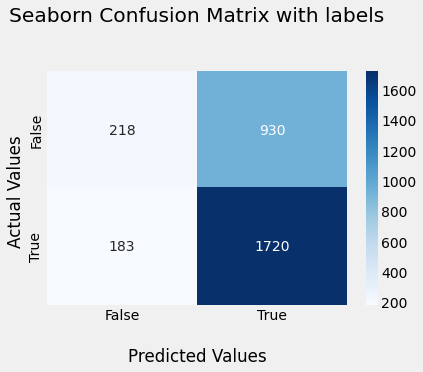

In [42]:
# Predicting value using test data
y_pred = logreg.predict(X_test_minmax)
# Evalutation metrics
print("Evalutation metrics\n",metrics.classification_report(y_test, y_pred))
# Confustion mertics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt = '')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [43]:
from sklearn.metrics import fbeta_score, precision_score, recall_score

p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f = fbeta_score(y_test, y_pred, beta=2.0)
print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

Result: p=0.649, r=0.904, f=0.838


No Skill: ROC AUC=0.500
Logistic regression: ROC AUC=0.622


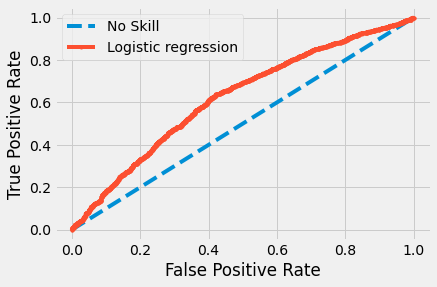

In [44]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test_minmax)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()